# Credit Risk Analysis
Name: Jimmy Jaya Nugraha

# Objective
- Make model that able to rank (give probability) each customer's credit risk

# Import Libraries and Load Dataset

## Import Libraries

In [1]:
# Import Libraries
import sys #for show its version below
import pandas as pd
import numpy as np
import matplotlib #for show its version below
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost #for show its version below
from xgboost import XGBClassifier

import sklearn #for show its version below
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score

import imblearn #for show its version below
from imblearn.under_sampling import TomekLinks, AllKNN
from imblearn.over_sampling import SMOTENC, RandomOverSampler

import pickle


In [2]:
# Show version of python and other libraries
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sklearn.__version__)
print('Xgboost version:', xgboost.__version__)
print('Imblearn version:', imblearn.__version__)


Python version: 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
Pandas version: 1.4.1
Numpy version: 1.22.3
Matplotlib version: 3.5.1
Seaborn version: 0.11.2
Sklearn version: 1.0.2
Xgboost version: 1.6.0
Imblearn version: 0.9.0


## Load Dataset

In [3]:
# Load Data
app_test_ori = pd.read_csv('app_test.csv')
app_train_ori = pd.read_csv('app_train.csv')
columns_desc_ori = pd.read_csv('columns_description.csv')
installment_payment_ori=pd.read_csv('installment_payment.csv')
prev_app_ori = pd.read_csv('prev_app.csv')

In [5]:
# Make duplicate of original data
app_test = app_test_ori.copy()
app_train = app_train_ori.copy()
columns_desc = columns_desc_ori.copy()
installment_payment = installment_payment_ori.copy()
prev_app = prev_app_ori.copy()

In [6]:
# Show head of test dataset
app_test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [7]:
# Show head of train dataset
app_train.head()


,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [8]:
# Show head of column description dataset
columns_desc.head()

,Table,Columns,Description
0,loanapptrain.csv / loanapptest.csv,LN_ID,Loan ID
1,"loanapptrain.csv / loanapptest.csv,TARGET,""Tar...",NaN,NaN
2,loanapptrain.csv / loanapptest.csv,CONTRACT_TYPE,Identification if loan is cash or revolving
3,loanapptrain.csv / loanapptest.csv,GENDER,Gender of the client
4,loanapptrain.csv / loanapptest.csv,NUM_CHILDREN,Number of children the client has


In [9]:
# Show head of installment payment dataset
installment_payment.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000


In [10]:
# Show head of previous application history dataset
prev_app.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


# Exploratory Data Analysis

## Check Data Type and Handling Missing Values in Train and Test Set

### app_test

#### Check Data Type

In [11]:
# Check info of data
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14761 non-null  int64  
 1   LN_ID              14761 non-null  int64  
 2   TARGET             14761 non-null  int64  
 3   CONTRACT_TYPE      14761 non-null  object 
 4   GENDER             14761 non-null  object 
 5   NUM_CHILDREN       14761 non-null  int64  
 6   INCOME             14761 non-null  float64
 7   APPROVED_CREDIT    14761 non-null  float64
 8   ANNUITY            14761 non-null  float64
 9   PRICE              14741 non-null  float64
 10  INCOME_TYPE        14761 non-null  object 
 11  EDUCATION          14761 non-null  object 
 12  FAMILY_STATUS      14761 non-null  object 
 13  HOUSING_TYPE       14761 non-null  object 
 14  DAYS_AGE           14761 non-null  int64  
 15  DAYS_WORK          14761 non-null  int64  
 16  DAYS_REGISTRATION  147

In [12]:
# Check Missing Value
app_test.isnull().sum()

Unnamed: 0              0
LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                  20
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          8312
EXT_SCORE_2            19
EXT_SCORE_3          2919
dtype: int64

The data type is already correct. However, there are some missing values in PRICE, EXT_SCORE_1, EXT SCORE_2, EXT SCORE_3.

#### Check the Describe Summary of Data

In [13]:
# Check the describe of data
app_test.describe()

,Unnamed: 0,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,14761.000000,14761.000000,14761.000000,14761.000000,1.476100e+04,1.476100e+04,14761.000000,1.474100e+04,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,6449.000000,14742.000000,11842.000000
mean,154253.864643,278759.502879,0.081499,0.411828,1.674965e+05,5.961318e+05,27127.497764,5.361929e+05,-16024.982115,65527.059820,-4989.848249,-3009.099790,12.067475,0.507092,0.515809,0.511901
std,88185.627857,102112.465678,0.273608,0.709092,9.538766e+04,3.996861e+05,14473.650999,3.665194e+05,4369.316681,142694.978431,3523.896416,1507.562327,3.242051,0.211769,0.189662,0.195482
min,47.000000,100054.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2187.000000,4.500000e+04,-25165.000000,-16375.000000,-21865.000000,-6337.000000,0.000000,0.017095,0.000013,0.000527
25%,78418.000000,190910.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16654.500000,2.385000e+05,-19705.000000,-2784.000000,-7576.000000,-4310.000000,10.000000,0.339551,0.395380,0.370650
50%,154391.000000,278940.000000,0.000000,0.000000,1.440000e+05,5.094000e+05,24822.000000,4.500000e+05,-15682.000000,-1221.000000,-4527.000000,-3290.000000,12.000000,0.511271,0.566284,0.537070
75%,230217.000000,366655.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34573.500000,6.795000e+05,-12381.000000,-275.000000,-1975.000000,-1728.000000,14.000000,0.677166,0.663389,0.670652
max,307505.000000,456249.000000,1.000000,5.000000,2.930026e+06,4.050000e+06,177826.500000,4.050000e+06,-7689.000000,365243.000000,0.000000,0.000000,23.000000,0.944420,0.855000,0.882530


#### Getting Insight from Distribution of The Data

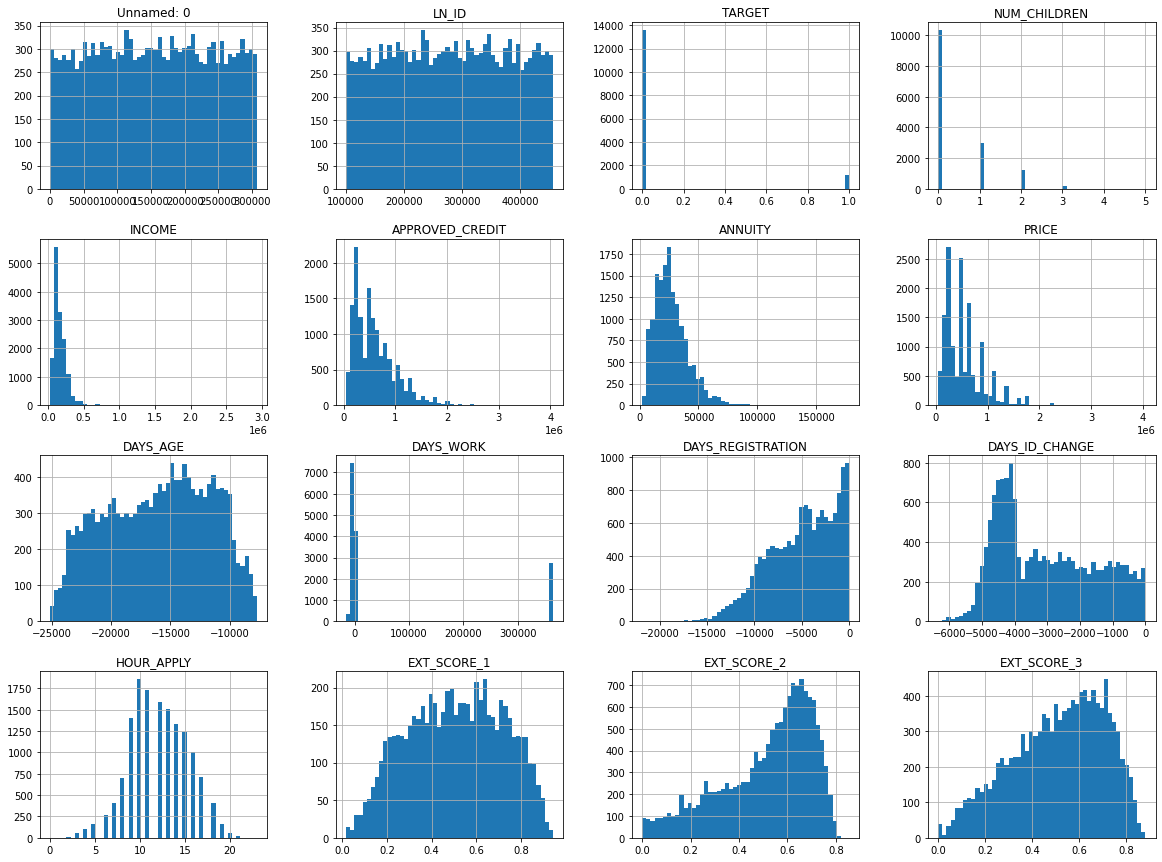

In [14]:
# Create graphs showing the histogram distribution of each column
app_test.hist(bins=50, figsize=(20,15))
plt.show()

- It seems that many features is skewed and even have some outlayers. 
- The very visible oulayer is DAYS_WORK that shows over 300000 days, which is over 800 years. 

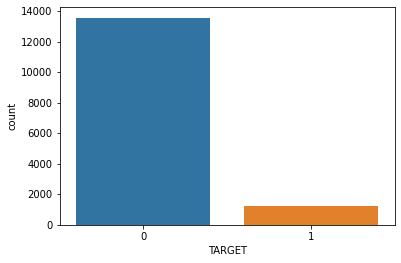

In [15]:
# Create countplot to see the distribution of the target test
sns.countplot(x='TARGET', data=app_test)
plt.show()

It seems that the target is quite imbalanced

#### Handling Missing Values
The missing values will be handled along with the train set because we eill use data from train set to be fitted to handle the missing values

### app_train

#### Check Data Type

In [16]:
# Check info of data
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

In [17]:
# Check Missing Value
app_train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

The data type is already correct. However, there are some missing values in ANNUITY, PRICE, EXT_SCORE_1, EXT SCORE_2, EXT SCORE_3.

#### Check the Describe Summary of Data

In [18]:
# Check the describe of data
app_train.describe()

,Unnamed: 0,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,61503.000000,61503.000000,61503.000000,61503.000000,6.150300e+04,6.150300e+04,61502.000000,6.144100e+04,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,26658.000000,6.136900e+04,49264.000000
mean,153729.986927,278151.136416,0.080793,0.411850,1.690789e+05,5.976899e+05,27083.323315,5.369033e+05,-16057.481033,64882.262768,-4976.696324,-2996.374681,12.055136,0.504081,5.141378e-01,0.510787
std,88881.478853,102918.206671,0.272519,0.716686,1.339697e+05,4.016493e+05,14470.508291,3.685742e+05,4363.536919,142154.440320,3520.926325,1512.409598,3.273323,0.210390,1.912087e-01,0.194541
min,6.000000,100009.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,-25229.000000,-17912.000000,-22928.000000,-6274.000000,0.000000,0.018334,8.173617e-08,0.000527
25%,76545.500000,188767.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,-19716.500000,-2761.000000,-7479.000000,-4304.000000,10.000000,0.336294,3.926921e-01,0.370650
50%,153893.000000,278357.000000,0.000000,0.000000,1.485000e+05,5.124465e+05,24853.500000,4.500000e+05,-15753.000000,-1208.000000,-4498.000000,-3263.000000,12.000000,0.508522,5.658808e-01,0.535276
75%,230884.500000,367424.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12450.000000,-276.000000,-1996.000000,-1713.000000,14.000000,0.677160,6.637879e-01,0.667458
max,307510.000000,456255.000000,1.000000,9.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,-7673.000000,365243.000000,0.000000,0.000000,23.000000,0.951624,8.549997e-01,0.896010


#### Getting Insight from Distribution of The Data

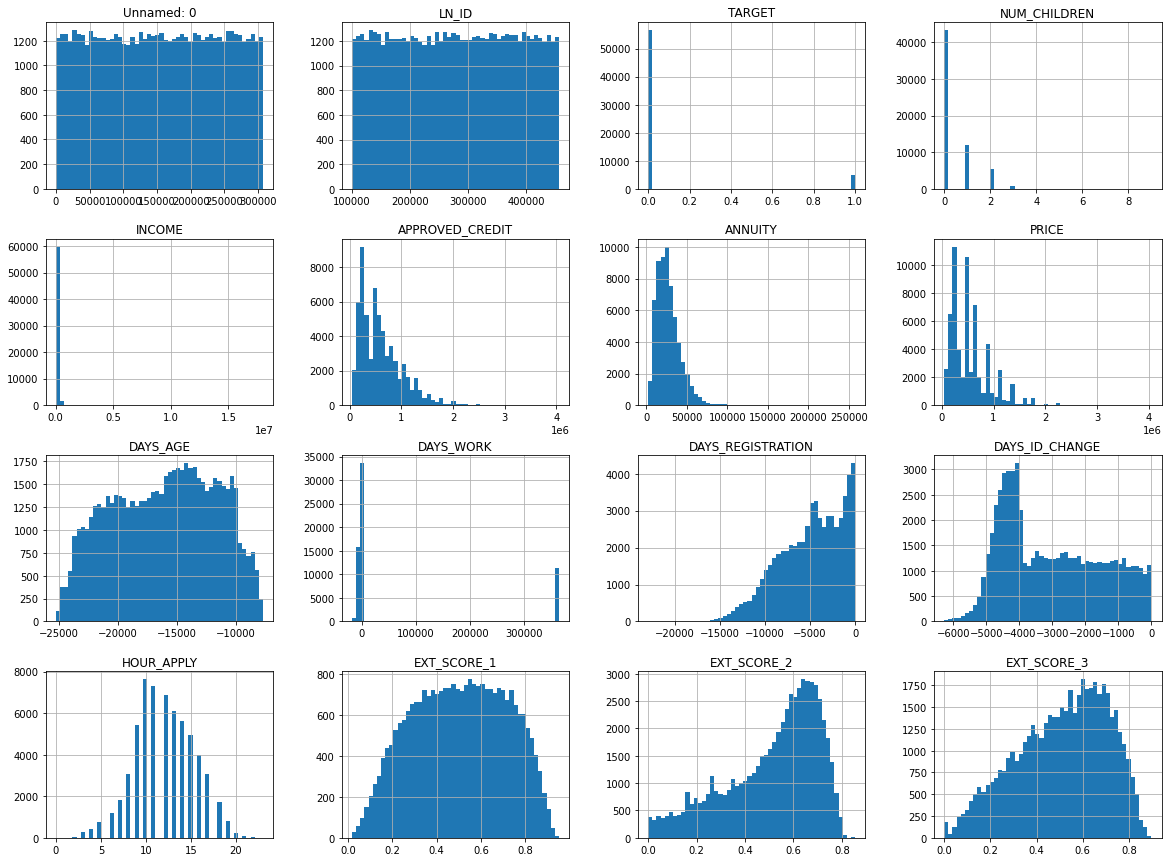

In [19]:
# Create graphs showing the histogram distribution of each column
app_train.hist(bins=50, figsize=(20,15))
plt.show()

- It seems that the distribution of the features in app_train is very similar with app_test.
- There are many skewed distribution and there are visible outliers in DAYS_WORK

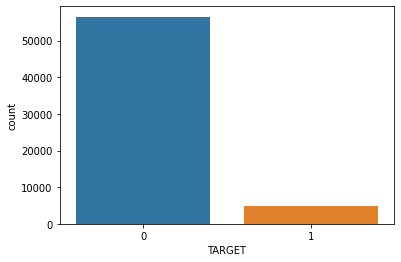

In [20]:
# Create countplot to see the distribution of the target test
sns.countplot(x='TARGET', data=app_train)
plt.show()

Both train and test set target is heavily imbalanced so there is a need to handle this imbalance dataset.

#### Handling Missing Values

In [21]:
# Drop rows with missing value in ANNUITY since it only 1 row with missing value
app_train = app_train.dropna(subset=['ANNUITY'])

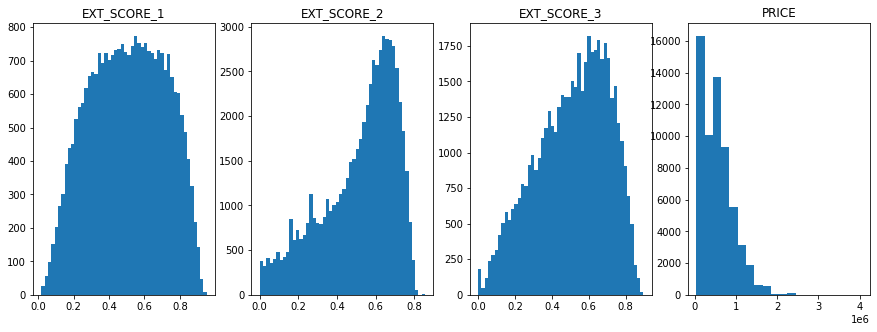

In [22]:
# Make histogram of EXT_SCORE_1, EXT_SCORE_2, EXT_SCORE_3, PRICE
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].hist(app_train['EXT_SCORE_1'], bins=50)
ax[0].set_title('EXT_SCORE_1')
ax[1].hist(app_train['EXT_SCORE_2'], bins=50)
ax[1].set_title('EXT_SCORE_2')
ax[2].hist(app_train['EXT_SCORE_3'], bins=50)
ax[2].set_title('EXT_SCORE_3')
ax[3].hist(app_train['PRICE'], bins=20)
ax[3].set_title('PRICE')
plt.show()


In [23]:
# Show skewness of EXT_SCORE_1, EXT_SCORE_2, EXT_SCORE_3, PRICE
app_train_skewness = app_train[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'PRICE']].skew().reset_index().rename(columns={'index':'column_name', 0:'skewness'})
app_train_skewness.sort_values(by='skewness', ascending=False)


,column_name,skewness
3,PRICE,1.339160
0,EXT_SCORE_1,-0.077465
2,EXT_SCORE_3,-0.405918
1,EXT_SCORE_2,-0.790528


In [24]:
# Make list of normal and skewed columns
app_normal_col= app_train_skewness[(app_train_skewness['skewness'] >= -0.5) & (app_train_skewness['skewness'] <= 0.5)]['column_name'].tolist()
app_skewed_col= app_train_skewness[(app_train_skewness['skewness'] < -0.5) | (app_train_skewness['skewness'] > 0.5)]['column_name'].tolist()
print('normal dist : ',app_normal_col)
print('skewed dist : ',app_skewed_col)

normal dist :  ['EXT_SCORE_1', 'EXT_SCORE_3']
skewed dist :  ['EXT_SCORE_2', 'PRICE']


In [25]:
# Input missing value of normal distribution with mean and skewed distribution with median using SimpleImputer
# Define the imputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer to data train
imputer_mean.fit(app_train[app_normal_col])
imputer_median.fit(app_train[app_skewed_col])

# Transform the data train
app_train[app_normal_col] = imputer_mean.transform(app_train[app_normal_col])
app_train[app_skewed_col] = imputer_median.transform(app_train[app_skewed_col])

# Transform the data test
app_test[app_normal_col] = imputer_mean.transform(app_test[app_normal_col])
app_test[app_skewed_col] = imputer_median.transform(app_test[app_skewed_col])

### columns_desc

#### Check Data Type

In [26]:
# Check info of data
columns_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        48 non-null     object
 1   Columns      40 non-null     object
 2   Description  40 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


The data type is already correct and there is no missing value. It means there are description on each column.

#### Handling Missing Values
Since it is only contain column description, there is no need to handle or check missin values.

### installment_payment

#### Check Data Type

In [27]:
# Check info of data
installment_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872306 entries, 0 to 2872305
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   SK_ID_PREV   int64  
 2   LN_ID        int64  
 3   INST_NUMBER  int64  
 4   INST_DAYS    float64
 5   PAY_DAYS     float64
 6   AMT_INST     float64
 7   AMT_PAY      float64
dtypes: float64(4), int64(4)
memory usage: 175.3 MB


In [28]:
# Check Missing Value
installment_payment.isnull().sum()

Unnamed: 0       0
SK_ID_PREV       0
LN_ID            0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64

The data type is already correct. However, there are some missing values in PAY_DAYS, AMT_PAY

#### Handling Missing Values
In this case missing value only comes from both PAY_DAYS and AMT_PAY is null. So, we will consider it as have not paid yet. and does not do imputation.

### prev_app

#### Check Data Type

In [29]:
# Check info of data
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350712 entries, 0 to 350711
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 350712 non-null  int64  
 1   SK_ID_PREV                 350712 non-null  int64  
 2   LN_ID                      350712 non-null  int64  
 3   CONTRACT_TYPE              350712 non-null  object 
 4   ANNUITY                    274103 non-null  float64
 5   APPLICATION                350712 non-null  float64
 6   APPROVED_CREDIT            350712 non-null  float64
 7   AMT_DOWN_PAYMENT           164205 non-null  float64
 8   PRICE                      271072 non-null  float64
 9   WEEKDAYS_APPLY             350712 non-null  object 
 10  HOUR_APPLY                 350712 non-null  int64  
 11  CONTRACT_STATUS            350712 non-null  object 
 12  DAYS_DECISION              350712 non-null  int64  
 13  TERM_PAYMENT               27

In [30]:
# Check Missing Value
prev_app.isnull().sum()

Unnamed: 0                        0
SK_ID_PREV                        0
LN_ID                             0
CONTRACT_TYPE                     0
ANNUITY                       76609
APPLICATION                       0
APPROVED_CREDIT                   0
AMT_DOWN_PAYMENT             186507
PRICE                         79640
WEEKDAYS_APPLY                    0
HOUR_APPLY                        0
CONTRACT_STATUS                   0
DAYS_DECISION                     0
TERM_PAYMENT                  76609
YIELD_GROUP                       0
FIRST_DRAW                   139305
FIRST_DUE                    139305
TERMINATION                  139305
NFLAG_INSURED_ON_APPROVAL    139305
dtype: int64

The data type is correct. However, there are some missing values in ANNUITY, AMT_DOWN_PAYMENT, PRICE, TERM_PAYMENT, FIRST_DRAW, FIRST_DUE, TERMINATION, NFLAG_INSURED_ON_APPROVAL.

#### Handling Missing Values
Since the missing value appears in many columns, and this table is most likely related to previous table. So, the missing value will be handled after we merge the tables.

## Check Unique Value and Count of Train Set for Gaining Further Information


In [31]:
# Check the value of column
app_train['CONTRACT_TYPE'].value_counts()

Cash loans         55698
Revolving loans     5804
Name: CONTRACT_TYPE, dtype: int64

In [32]:
# Check the value of column
app_train['GENDER'].value_counts()

F    40549
M    20953
Name: GENDER, dtype: int64

In [33]:
# Check the value of column
app_train['INCOME_TYPE'].value_counts()

Working                 31620
Commercial associate    14217
Pensioner               11249
State servant            4407
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64

In [34]:
# Check the value of column
app_train['FAMILY_STATUS'].value_counts()

Married                 39370
Single / not married     9028
Civil marriage           5881
Separated                3970
Widow                    3253
Name: FAMILY_STATUS, dtype: int64

In [35]:
# Check the value of column
app_train['HOUSING_TYPE'].value_counts()

House / apartment      54647
With parents            2891
Municipal apartment     2203
Rented apartment         988
Office apartment         534
Co-op apartment          239
Name: HOUSING_TYPE, dtype: int64

In [36]:
# Check the value of column
app_train['WEEKDAYS_APPLY'].value_counts()

TUESDAY      10838
WEDNESDAY    10477
MONDAY       10234
THURSDAY     10011
FRIDAY        9992
SATURDAY      6795
SUNDAY        3155
Name: WEEKDAYS_APPLY, dtype: int64

In [37]:
# Check the value of column
app_train['EDUCATION'].value_counts()

Secondary / secondary special    43776
Higher education                 14887
Incomplete higher                 2045
Lower secondary                    760
Academic degree                     34
Name: EDUCATION, dtype: int64

In [38]:
# Check the value of column
app_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    13561
NA1                       11253
Self-employed              7700
Other                      3304
Medicine                   2224
Business Entity Type 2     2083
Government                 2045
School                     1787
Trade: type 7              1557
Kindergarten               1388
Construction               1374
Business Entity Type 1     1185
Transport: type 4          1020
Trade: type 3               663
Industry: type 9            660
Industry: type 3            638
Housing                     611
Security                    596
Military                    540
Industry: type 11           533
Bank                        526
Agriculture                 504
Police                      457
Transport: type 2           436
Postal                      413
Security Ministries         399
Trade: type 2               371
Restaurant                  352
University                  311
Services                    301
Industry: type 7            241
Transpor

# Historical Data Analysis

We will make summary of customer historical data that derived from previous application.

## Divide the Customer Based on Its Payment Day and Create Payment Status Feature

In [39]:
# Create new column which show difference between PAY_DAYS and INST_DAY 
# to see if costumer has already paid the installment or not, also to see if the customer is early payer or late payer
installment_payment['PAY_DAYS_DIFF'] = installment_payment['INST_DAYS'] - installment_payment['PAY_DAYS']

In [40]:
# Query installment that havent been paid after passing due date (late customer)
late_customer = installment_payment[installment_payment['PAY_DAYS'].isnull()==True]
late_customer.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,PAY_DAYS_DIFF
645595,3764213,1265332,167942,5,-14.0,NaN,11650.500,NaN,NaN
645596,3764219,2776343,151961,31,-2.0,NaN,15097.275,NaN,NaN
645597,3764228,2312379,107766,46,-1464.0,NaN,67.500,NaN,NaN
645598,3764229,1319969,133112,22,-58.0,NaN,33089.310,NaN,NaN
645599,3764231,1153254,120931,26,-1440.0,NaN,67.500,NaN,NaN


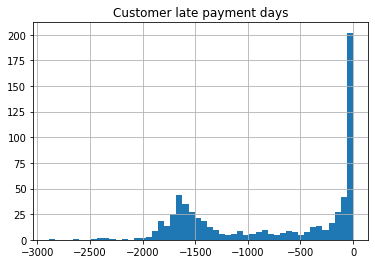

In [41]:
# Make histogram of late_customer INST_DAY
late_customer['INST_DAYS'].hist(bins=50)
plt.title("Customer late payment days")
plt.show()

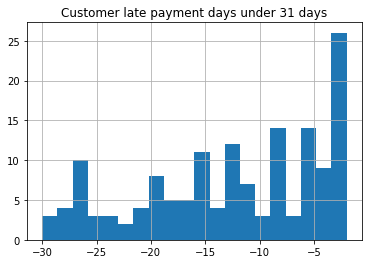

In [42]:
# Make histogram to see customer which is late under 31 days
late_customer[late_customer['INST_DAYS']>=-30]['INST_DAYS'].hist(bins=20)
plt.title("Customer late payment days under 31 days")
plt.show()

<AxesSubplot:>

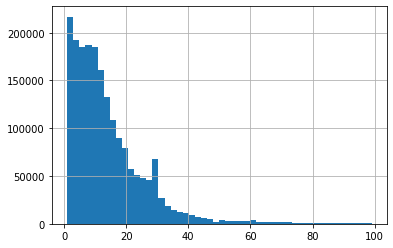

In [43]:
# Show the behavioral data of customer who is late payer
installment_payment[(installment_payment['PAY_DAYS_DIFF']<100)&(installment_payment['PAY_DAYS_DIFF']>0)]['PAY_DAYS_DIFF'].hist(bins=50)

Based on histograms, it seems, there are many customer which still willing to pay after late under a week, it still continue decreaseing as the number of late days is increasing. Therefore we can divide the customer into several class.<br>
In this case we divided it by : 
- paid late more than a month 
- paid late between 8-30 days
- paid late within a week
- paid in time
- not pay under a week (moderate chance to pay the loan)
- not pay under between 8-30 days (low chance to pay the loan)
- not pay more than a month. (low to zero chance to pay the loan)
 <br><br> 

In this case, we believe on this assumption: the possibility of customer to pay the loan is more likely to decrease as the number of late days is increase.

In [44]:
# Create customer last_payment_status column on installment_payment
# Create status list 
status =[]
for h,i in enumerate(installment_payment['PAY_DAYS_DIFF']):
    if i <=-30:
        status.append('Paid late more than a month')
    elif i <= -8:
        status.append('Paid late between 8 and 30 days')
    elif i <= -1:
        status.append('Paid late within a week')
    elif i >= 0:
        status.append('Paid in time')
    else:
        if installment_payment['INST_DAYS'][h] >=-7:
            status.append('Not pay within a week')
        elif installment_payment['INST_DAYS'][h] >=-30:
            status.append('Not pay between 8-30 days')
        else:
            status.append('Not pay above a Month')

# Create a new column on installment_payment
installment_payment['LAST_PAYMENT_STATUS'] = status

In [45]:
# Show the value count of last_payment_status
installment_payment['LAST_PAYMENT_STATUS'].value_counts()

Paid in time                       2626523
Paid late within a week             171190
Paid late between 8 and 30 days      64346
Paid late more than a month           9574
Not pay above a Month                  523
Not pay between 8-30 days               98
Not pay within a week                   52
Name: LAST_PAYMENT_STATUS, dtype: int64

In [46]:
# See the result head
installment_payment.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,PAY_DAYS_DIFF,LAST_PAYMENT_STATUS
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375,33.0,Paid in time
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740,0.0,Paid in time
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080,7.0,Paid in time
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450,11.0,Paid in time
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000,13.0,Paid in time


## Merge Historical Tables (prev_app and installment_payment)

In [47]:
# Merge prev_app and installment_payment on SK_ID_PREV
prev_app_installment_payment = prev_app.merge(installment_payment, on=['SK_ID_PREV','LN_ID'], how='outer')
prev_app_installment_payment.head()

,Unnamed: 0_x,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,...,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Unnamed: 0_y,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,PAY_DAYS_DIFF,LAST_PAYMENT_STATUS
0,0.0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,...,-37.0,0.0,6520759.0,1.0,-42.0,-42.0,17284.275,17284.275,0.0,Paid in time
1,3.0,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,-177.0,1.0,108784.0,8.0,-272.0,-281.0,47041.335,47041.335,9.0,Paid in time
2,3.0,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,-177.0,1.0,275973.0,7.0,-302.0,-305.0,47041.335,47041.335,3.0,Paid in time
3,3.0,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,-177.0,1.0,811980.0,11.0,-182.0,-197.0,92720.025,92720.025,15.0,Paid in time
4,3.0,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,-177.0,1.0,1505617.0,10.0,-212.0,-214.0,47041.335,47041.335,2.0,Paid in time


This merge process use two columns because after trial and errors, it could be concluded that by this way, the LN_ID will have not null, and if either one of the dataframes have SK_ID_PREV that only exist in that dataframe (it means that another dataframe doesn't have that SK_ID_PREV and the value will be null), then the merge will use SK_ID_PREV that the dataframe that have non-null SK_ID_PREV.<br>
The result has been checked and it shows all of the information on both dataframes could be preserved.

In [48]:
# See if there any null in LAST_PAYMENT_STATUS
prev_app_installment_payment['LAST_PAYMENT_STATUS'].isnull().sum()

147074

In [49]:
# Query the null rows and count the value of Contract status
prev_app_installment_payment[prev_app_installment_payment['LAST_PAYMENT_STATUS'].isnull()==True]['CONTRACT_STATUS'].value_counts()

Canceled        64590
Refused         60795
Approved        16049
Unused offer     5640
Name: CONTRACT_STATUS, dtype: int64

It seems that the null rows is mostly come from transaction that don't supposed to be paid (Canceled, Refused, and Unused Offer), 
Meanwhile, the approved one will be further investigated below:

In [50]:
# Check the head of row that have null in LAST_PAYMENT_STATUS and Approved CONTRACT_STATUS 
investigation_1 =prev_app_installment_payment[(prev_app_installment_payment['LAST_PAYMENT_STATUS'].isnull()==True) & (prev_app_installment_payment['CONTRACT_STATUS']=='Approved')]
investigation_1.head(8).T

,206,461,719,794,813,944,1347,1962
Unnamed: 0_x,138.0,361.0,608.0,672.0,706.0,787.0,1000.0,1196.0
SK_ID_PREV,1897668,2240087,1590725,2825333,1256552,2707952,2632994,1439417
LN_ID,205582,434717,350737,127550,343616,315596,422700,308714
CONTRACT_TYPE,Revolving loans,Consumer loans,Consumer loans,Revolving loans,Consumer loans,Revolving loans,Revolving loans,Consumer loans
ANNUITY,2250.0,4252.23,12512.16,6750.0,9150.93,33750.0,3375.0,4753.26
APPLICATION,45000.0,26811.0,88285.5,135000.0,76455.0,675000.0,67500.0,29970.0
APPROVED_CREDIT,45000.0,26811.0,85059.0,135000.0,74866.5,675000.0,67500.0,29970.0
AMT_DOWN_PAYMENT,NaN,0.0,8820.0,NaN,7645.5,NaN,NaN,0.0
PRICE,45000.0,26811.0,88285.5,135000.0,76455.0,675000.0,67500.0,29970.0
WEEKDAYS_APPLY,MONDAY,SUNDAY,TUESDAY,FRIDAY,MONDAY,SATURDAY,FRIDAY,THURSDAY


In [51]:
# Calculate the investigation_1 null TERMINATION column
investigation_1['TERMINATION'].isnull().sum()

8200

<AxesSubplot:>

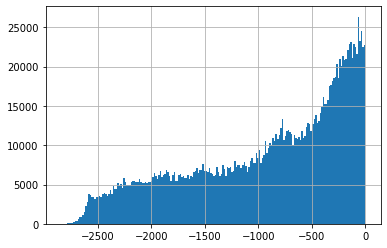

In [52]:
# See the majority distribution of TERMINATION
prev_app_installment_payment[prev_app_installment_payment['TERMINATION']<350000]['TERMINATION'].hist(bins=200)

In [53]:
# Calculate the value count of non-null value in TERMINATION column
investigation_1['TERMINATION'].value_counts()

 365243.0    6991
-84.0           9
-150.0          9
-176.0          9
-69.0           8
             ... 
-331.0          1
-75.0           1
-582.0          1
-226.0          1
-343.0          1
Name: TERMINATION, Length: 308, dtype: int64

>The data show that there are a bunch of approved transactions without any detail of payment. Majorly, it comes from value of either 365243 or null values. As a result, we will not use that rows for payment history metrics (it will be excluded)

## Summary the Historical data

### Create Dataframe for all aggregated data

In [54]:
# Create empty dataframe to store the data
historical_order_summary = pd.DataFrame()

### Create Last Loan Status (Fully Paid =1,  Other Cases=0)

In [55]:
pivot_1 = prev_app_installment_payment.pivot_table(index='SK_ID_PREV', values=['TERM_PAYMENT','INST_NUMBER','AMT_INST', 'AMT_PAY'], 
            aggfunc={
                'TERM_PAYMENT':['max']
                ,'INST_NUMBER':['max']
                ,'AMT_INST':['sum']
                ,'AMT_PAY':['sum']                
                }).reset_index()
pivot_1

,SK_ID_PREV,AMT_INST,AMT_PAY,INST_NUMBER,TERM_PAYMENT
,,sum,sum,max,max
0,1000020,220742.055,220742.055,12.0,12.0
1,1000023,98896.545,98896.545,4.0,14.0
2,1000024,35643.420,35643.420,12.0,12.0
3,1000026,93430.620,93430.620,4.0,6.0
4,1000027,52836.795,52836.795,6.0,6.0
...,...,...,...,...,...
358803,2845335,0.000,0.000,NaN,NaN
358804,2845361,0.000,0.000,NaN,NaN
358805,2845369,0.000,0.000,NaN,4.0


In [56]:
# Convert the pivot to dataframe
historical_order_summary['SK_ID_PREV'] = pivot_1['SK_ID_PREV']
historical_order_summary['INST_NUMBER_MAX'] = pivot_1['INST_NUMBER']['max']
historical_order_summary['TERM_PAYMENT_MAX'] = pivot_1['TERM_PAYMENT']['max']
historical_order_summary['AMT_INST_SUM'] = pivot_1['AMT_INST']['sum']
historical_order_summary['AMT_PAY_SUM'] = pivot_1['AMT_PAY']['sum']
historical_order_summary.head()

,SK_ID_PREV,INST_NUMBER_MAX,TERM_PAYMENT_MAX,AMT_INST_SUM,AMT_PAY_SUM
0,1000020,12.0,12.0,220742.055,220742.055
1,1000023,4.0,14.0,98896.545,98896.545
2,1000024,12.0,12.0,35643.420,35643.420
3,1000026,4.0,6.0,93430.620,93430.620
4,1000027,6.0,6.0,52836.795,52836.795


By looking at the data, we can say that when (INST_NUMBER_MAX == TERM_NUMBER_MAX) and (AMT_INST_SUM == AMT_PAY_SUM), it could be categorized as Fully Paid (1), whereas if not it could be categorized as not fully paid on exact amount or other cases (0)

In [57]:
# Create term comparison column
term_comparison =[]
for i,j in enumerate(historical_order_summary['TERM_PAYMENT_MAX']):
    if j == historical_order_summary['INST_NUMBER_MAX'][i]:
        term_comparison.append(1)
    else:
        term_comparison.append(0)
historical_order_summary['TERM_COMPARISON'] = term_comparison

In [58]:
# Create amt comparison column
amt_comparison =[]
for i,j in enumerate(historical_order_summary['AMT_PAY_SUM']):
    if j == historical_order_summary['AMT_INST_SUM'][i]:
        amt_comparison.append(1)
    else:
        amt_comparison.append(0)
historical_order_summary['AMT_COMPARISON'] = amt_comparison

In [59]:
# Create Fully Paid column
fully_paid =[]
for i,j in enumerate(historical_order_summary['AMT_COMPARISON']):
    if j == historical_order_summary['TERM_COMPARISON'][i]:
        fully_paid.append('Yes')
    else:
        fully_paid.append('Not Known')
historical_order_summary['FULLY_PAID'] = fully_paid

In [60]:
historical_order_summary[['SK_ID_PREV','FULLY_PAID']].head()

,SK_ID_PREV,FULLY_PAID
0,1000020,Yes
1,1000023,Not Known
2,1000024,Yes
3,1000026,Not Known
4,1000027,Yes


In [61]:
# Merge Fully Paid and to prev_app_installment_payment
prev_app_installment_payment = prev_app_installment_payment.merge(historical_order_summary[['SK_ID_PREV','FULLY_PAID']], on=['SK_ID_PREV'], how='outer')

### Create More Derived Features using Pivot Table in Customer Loan History

In [62]:
# Show the unique value of CONTRACT_STATUS
prev_app_installment_payment['CONTRACT_STATUS'].unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer', nan],
      dtype=object)

In [63]:
# Query historical order by contract status 'Approved', 'Canceled', 'Refused', 'Unused offer', nan
hist_approved = prev_app_installment_payment[prev_app_installment_payment['CONTRACT_STATUS']=='Approved']
hist_canceled = prev_app_installment_payment[prev_app_installment_payment['CONTRACT_STATUS']=='Canceled']
hist_refused = prev_app_installment_payment[prev_app_installment_payment['CONTRACT_STATUS']=='Refused']
hist_unused_offer = prev_app_installment_payment[prev_app_installment_payment['CONTRACT_STATUS']=='Unused offer']
hist_nan = prev_app_installment_payment[prev_app_installment_payment['CONTRACT_STATUS'].isnull()==True]

In [64]:
# Create Pivot Table to calculate number of approved loan, sum and average of approved credit, max annuity, last loan status, sum of insurance used, and last payment status of each customer LN_ID
pivot_approved = hist_approved.pivot_table(index='LN_ID', values=['SK_ID_PREV','APPROVED_CREDIT','ANNUITY','FULLY_PAID','NFLAG_INSURED_ON_APPROVAL','LAST_PAYMENT_STATUS'], 
aggfunc={
    'SK_ID_PREV':['nunique'],
    'APPROVED_CREDIT':['sum','mean'],
    'ANNUITY':['max'],
    'FULLY_PAID':['last'],
    'NFLAG_INSURED_ON_APPROVAL':['sum'], 
    'LAST_PAYMENT_STATUS':['last']
    }).reset_index()
pivot_approved

LN_ID    ANNUITY APPROVED_CREDIT             FULLY_PAID  \
                     max            mean         sum       last   
0      100009  17341.605    73330.085106   3446514.0        Yes   
1      100039  52513.515   790615.714286  16602930.0  Not Known   
2      100044  29545.200   355720.816901  25256178.0  Not Known   
3      100045  50575.230   544186.617188  34827943.5        Yes   
4      100046  28390.635   407911.500000   6934495.5  Not Known   
...       ...        ...             ...         ...        ...   
71912  456247  17304.480    73714.108696   1695424.5        Yes   
71913  456248  67725.495   778112.808511  36571302.0  Not Known   
71914  456249  22770.405   191880.000000   2302560.0        Yes   
71915  456252  10074.465    56821.500000    340929.0        Yes   
71916  456255  54022.140   664183.337838  49149567.0  Not Known   

           LAST_PAYMENT_STATUS NFLAG_INSURED_ON_APPROVAL SK_ID_PREV  
                          last                       sum    nunique  
0                 Paid in time                       0.0          7  
1                 Paid in time                      15.0          3  
2      Paid late within a week                      45.0          4  
3      Paid late within a week                      31.0          4  
4                 Paid in time                      17.0          1  
...                        ...                       ...        ...  
71912             Paid in time                       5.0          4  
71913             Paid in time                      46.0          4  
71914             Paid in time                       0.0          1  
71915             Paid in time                       6.0          1  
71916             Paid in time                      23.0          6  

[71917 rows x 8 columns]

In [65]:
# Create Pivot Table to calculate number of canceled loan of each customer LN_ID
pivot_canceled = hist_canceled.pivot_table(index='LN_ID', values=['SK_ID_PREV'], 
aggfunc={
    'SK_ID_PREV':['nunique']
    }).reset_index()
pivot_canceled

,LN_ID,SK_ID_PREV
,,nunique
0,100039,1
1,100051,1
2,100077,10
3,100093,2
4,100135,4
...,...,...
27578,456184,2
27579,456203,2
27580,456211,4


In [66]:
# Create Pivot Table to calculate number of refused loan of each customer LN_ID
pivot_refused = hist_refused.pivot_table(index='LN_ID', values=['SK_ID_PREV'], 
aggfunc={
    'SK_ID_PREV':['nunique']
    }).reset_index()
pivot_refused

,LN_ID,SK_ID_PREV
,,nunique
0,100046,1
1,100047,2
2,100051,1
3,100054,1
4,100077,12
...,...,...
24910,456231,4
24911,456234,1
24912,456247,1


In [67]:
# Create Pivot Table to calculate number of nan loan of each customer LN_ID
pivot_nan = hist_nan.pivot_table(index='LN_ID', values=['SK_ID_PREV'], 
aggfunc={
    'SK_ID_PREV':['nunique']
    }).reset_index()
pivot_nan

,LN_ID,SK_ID_PREV
,,nunique
0,100009,1
1,100100,1
2,100131,1
3,100307,3
4,100313,1
...,...,...
7367,456158,1
7368,456203,1
7369,456220,1


Since nan or nul value can be approved, rejected , or any other else, It will not be used in calculations.

In [68]:
# Create Pivot Table to calculate number of unused_offer loan of each customer LN_ID
pivot_unused_offer = hist_unused_offer.pivot_table(index='LN_ID', values=['SK_ID_PREV'], 
aggfunc={
    'SK_ID_PREV':['nunique']
    }).reset_index()
pivot_unused_offer

,LN_ID,SK_ID_PREV
,,nunique
0,100093,1
1,100198,1
2,100210,1
3,100225,2
4,100249,2
...,...,...
4688,456156,3
4689,456180,1
4690,456220,1


In [69]:
# Create Pivot Table to calculate number of sum of insurance used of each customer LN_ID
# Make first pivot to group payment by SK_ID_PREV
pivot_insurance_1 = hist_approved.pivot_table(index='SK_ID_PREV', values=['LN_ID','NFLAG_INSURED_ON_APPROVAL'], 
aggfunc={
    'LN_ID':['max'],
    'NFLAG_INSURED_ON_APPROVAL':['max']
    }).reset_index()

# Input it into new dataframe to be able to be pivoted again
pivot_insurance_1_df = pd.DataFrame()
pivot_insurance_1_df['SK_ID_PREV'] = pivot_insurance_1['SK_ID_PREV']
pivot_insurance_1_df['LN_ID'] = pivot_insurance_1['LN_ID']['max']
pivot_insurance_1_df['NFLAG_INSURED_ON_APPROVAL'] = pivot_insurance_1['NFLAG_INSURED_ON_APPROVAL']['max']

pivot_insurance_1_df.head(2)

,SK_ID_PREV,LN_ID,NFLAG_INSURED_ON_APPROVAL
0,1000020,299072,0.0
1,1000023,350748,0.0


In [70]:
# Make second pivot to sum number of insurance used by each LN_ID 
pivot_insurance_2 = pivot_insurance_1_df.pivot_table(index='LN_ID', values=['NFLAG_INSURED_ON_APPROVAL'],
aggfunc={
    'NFLAG_INSURED_ON_APPROVAL':['sum']
    }).reset_index()
pivot_insurance_2

,LN_ID,NFLAG_INSURED_ON_APPROVAL
,,sum
0,100009,0.0
1,100039,2.0
2,100044,2.0
3,100045,2.0
4,100046,1.0
...,...,...
71912,456247,1.0
71913,456248,3.0
71914,456249,0.0


### Compile All Derived Features from Historical Data

In [71]:
# Compile all of the derived customer data in historical_cust_summary dataframe
historical_cust_summary = pd.DataFrame()
historical_cust_summary['LN_ID'] = pivot_approved['LN_ID']
historical_cust_summary['NUM_APPROVED'] = pivot_approved['SK_ID_PREV']['nunique']
historical_cust_summary['NUM_CANCELLED'] = pivot_canceled['SK_ID_PREV']['nunique']
historical_cust_summary['NUM_REFUSED'] = pivot_refused['SK_ID_PREV']['nunique']
historical_cust_summary['NUM_UNUSED_OFFER'] = pivot_unused_offer['SK_ID_PREV']['nunique']
historical_cust_summary['SUM_APPROVED_CREDIT'] = pivot_approved['APPROVED_CREDIT']['sum']
historical_cust_summary['AVG_APPROVED_CREDIT'] = pivot_approved['APPROVED_CREDIT']['mean']
historical_cust_summary['MAX_APPROVED_ANNUITY'] = pivot_approved['ANNUITY']['max']
historical_cust_summary['FULLY_PAID'] = pivot_approved['FULLY_PAID']['last']
historical_cust_summary['NUM_INSURANCE_USED'] = pivot_insurance_2['NFLAG_INSURED_ON_APPROVAL']['sum']
historical_cust_summary['LAST_PAYMENT_STATUS'] = pivot_approved['LAST_PAYMENT_STATUS']['last']
historical_cust_summary.head()


,LN_ID,NUM_APPROVED,NUM_CANCELLED,NUM_REFUSED,NUM_UNUSED_OFFER,SUM_APPROVED_CREDIT,AVG_APPROVED_CREDIT,MAX_APPROVED_ANNUITY,FULLY_PAID,NUM_INSURANCE_USED,LAST_PAYMENT_STATUS
0,100009,7,1.0,1.0,1.0,3446514.0,73330.085106,17341.605,Yes,0.0,Paid in time
1,100039,3,1.0,2.0,1.0,16602930.0,790615.714286,52513.515,Not Known,2.0,Paid in time
2,100044,4,10.0,1.0,1.0,25256178.0,355720.816901,29545.200,Not Known,2.0,Paid late within a week
3,100045,4,2.0,1.0,2.0,34827943.5,544186.617188,50575.230,Yes,2.0,Paid late within a week
4,100046,1,4.0,12.0,2.0,6934495.5,407911.500000,28390.635,Not Known,1.0,Paid in time


# Data Preprocessing

## Merge Data with Historical Data.

### Merging Process

We will merge the historical data to the train and test set. <br>
If the LN_ID in the dataframe is new customer (no historical data), the numerical column will be inputed as 0 and categorical column will be inputed as 'no historical data'.

In [72]:
# Merge app_train also app_test with historical_cust_summary
app_train_with_historical = app_train.merge(historical_cust_summary, on='LN_ID', how='left')
app_test_with_historical = app_test.merge(historical_cust_summary, on='LN_ID', how='left')
app_train_with_historical.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,NUM_APPROVED,NUM_CANCELLED,NUM_REFUSED,NUM_UNUSED_OFFER,SUM_APPROVED_CREDIT,AVG_APPROVED_CREDIT,MAX_APPROVED_ANNUITY,FULLY_PAID,NUM_INSURANCE_USED,LAST_PAYMENT_STATUS
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,1.0,NaN,NaN,NaN,79038.0,19759.500000,5378.715,Yes,0.0,Paid in time
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,8.0,NaN,NaN,NaN,22923747.0,212256.916667,24248.340,Yes,7.0,Paid late within a week
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,4.0,NaN,NaN,NaN,7068483.0,235616.100000,45000.000,Yes,2.0,Paid in time
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,4.0,NaN,NaN,NaN,7920162.0,168514.085106,15737.985,Not Known,2.0,Paid in time
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,5.0,NaN,NaN,NaN,4881739.5,147931.500000,31237.380,Not Known,2.0,Paid in time


In [73]:
# Drop unused column: 'Unnamed: 0'
app_train_with_historical.drop(['Unnamed: 0'], axis=1, inplace=True)
app_test_with_historical.drop(['Unnamed: 0'], axis=1, inplace=True)

In [74]:
# Drop LN_ID column because it supposed to not related to the model
app_train_with_historical.drop(['LN_ID'], axis=1, inplace=True)
app_test_with_historical.drop(['LN_ID'], axis=1, inplace=True)

## Handling Missing Value that Comes After Merge Process

In [75]:
# Make list of numerical and categorical columns for merged data
merged_numerical = ['NUM_APPROVED','NUM_CANCELLED','NUM_REFUSED','NUM_UNUSED_OFFER','SUM_APPROVED_CREDIT','AVG_APPROVED_CREDIT','MAX_APPROVED_ANNUITY','NUM_INSURANCE_USED']
merged_categorical = ['LAST_PAYMENT_STATUS','FULLY_PAID']

In [76]:
# Fill missing value with 0 using simple imputer on merged_numerical columns  
imputer_0 = SimpleImputer(strategy='constant', fill_value=0)
imputer_0.fit(app_train_with_historical[merged_numerical])
app_train_with_historical[merged_numerical] = imputer_0.transform(app_train_with_historical[merged_numerical])
app_test_with_historical[merged_numerical] = imputer_0.transform(app_test_with_historical[merged_numerical])

In [77]:
# Fill missing value nan with 'no historical data' using simple imputer_nan on merged_categorical columns
imputer_nan = SimpleImputer(strategy='constant', fill_value='no historical data')
imputer_nan.fit(app_train_with_historical[merged_categorical])
app_train_with_historical[merged_categorical] = imputer_nan.transform(app_train_with_historical[merged_categorical])
app_test_with_historical[merged_categorical] = imputer_nan.transform(app_test_with_historical[merged_categorical])

In [78]:
# Fill missing value None with 'no historical data' using simple imputer_none on merged_categorical columns
imputer_none = SimpleImputer(strategy='constant', fill_value='no historical data', missing_values=None)
imputer_none.fit(app_train_with_historical[merged_categorical])
app_train_with_historical[merged_categorical] = imputer_none.transform(app_train_with_historical[merged_categorical])
app_test_with_historical[merged_categorical] = imputer_none.transform(app_test_with_historical[merged_categorical])

In [79]:
# Show the head of dataset
app_train_with_historical.head()

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,...,NUM_APPROVED,NUM_CANCELLED,NUM_REFUSED,NUM_UNUSED_OFFER,SUM_APPROVED_CREDIT,AVG_APPROVED_CREDIT,MAX_APPROVED_ANNUITY,FULLY_PAID,NUM_INSURANCE_USED,LAST_PAYMENT_STATUS
0,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,...,1.0,0.0,0.0,0.0,79038.0,19759.500000,5378.715,Yes,0.0,Paid in time
1,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,...,8.0,0.0,0.0,0.0,22923747.0,212256.916667,24248.340,Yes,7.0,Paid late within a week
2,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,...,4.0,0.0,0.0,0.0,7068483.0,235616.100000,45000.000,Yes,2.0,Paid in time
3,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,...,4.0,0.0,0.0,0.0,7920162.0,168514.085106,15737.985,Not Known,2.0,Paid in time
4,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,5.0,0.0,0.0,0.0,4881739.5,147931.500000,31237.380,Not Known,2.0,Paid in time


In [80]:
# Check the sum of null values in train set
app_train_with_historical.isnull().sum().sum()

0

In [81]:
# Check the sum of null values in test set
app_test_with_historical.isnull().sum().sum()

0

## Train Test Target Splitting

In [82]:
# Separate X_train, y_train, X_test, y_test
X_train = app_train_with_historical.drop(['TARGET'], axis=1)
y_train = app_train_with_historical['TARGET']
X_test = app_test_with_historical.drop(['TARGET'], axis=1)
y_test = app_test_with_historical['TARGET']

In [83]:
# Separate numercal and categorical data
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("num_columns: ", num_columns)
print("cat_columns: ", cat_columns)

num_columns:  ['NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'NUM_APPROVED', 'NUM_CANCELLED', 'NUM_REFUSED', 'NUM_UNUSED_OFFER', 'SUM_APPROVED_CREDIT', 'AVG_APPROVED_CREDIT', 'MAX_APPROVED_ANNUITY', 'NUM_INSURANCE_USED']
cat_columns:  ['CONTRACT_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'WEEKDAYS_APPLY', 'ORGANIZATION_TYPE', 'FULLY_PAID', 'LAST_PAYMENT_STATUS']


## Handling Outlayer
In this case we dont handle outlayer because we will use tree based algorithm which should not be affected by outlayers

## Feature Splitting

### Separate Numerical and Categorical Data

In [84]:
# Separate numerical and categorical data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Feature Encoding

### Label Encoding

Since Education could be ordered and ranked, it should be encoded using Ordinal Encoder.

In [85]:
# Define feature to be encoded
ordinal_features = ['EDUCATION']
ohe_features = []
for i in cat_columns:
    if i not in ordinal_features:
        ohe_features.append(i) 

In [86]:
# Separate categorical data
X_train_cat_ordinal = X_train_cat[ordinal_features]
X_train_cat_ohe = X_train_cat[ohe_features]
X_test_cat_ordinal = X_test_cat[ordinal_features]
X_test_cat_ohe = X_test_cat[ohe_features]

### Ordinal Encoding

In [87]:
# Define the encoder
ordinal_encoder = OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']])
# Train to data train
ordinal_encoder.fit(X_train_cat_ordinal)

# Transform the data train and data test
X_train_cat_ordinal_encoded = ordinal_encoder.transform(X_train_cat_ordinal)
X_test_cat_ordinal_encoded = ordinal_encoder.transform(X_test_cat_ordinal)

### One-Hot Encoding

In [88]:
# One-hot encoding on categorical columns
# Define the encoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder to X_train_cat
ohe_encoder.fit(X_train_cat_ohe)

# Transform X_train_cat and X_test_cat
X_train_cat_ohe = ohe_encoder.transform(X_train_cat_ohe)
X_test_cat_ohe = ohe_encoder.transform(X_test_cat_ohe)

In [89]:
# Concatenate categorical ordinal and categorical ohe
X_train_cat_all_encoded = np.concatenate((X_train_cat_ordinal_encoded, X_train_cat_ohe), axis=1)
X_test_cat_all_encoded = np.concatenate((X_test_cat_ordinal_encoded, X_test_cat_ohe), axis=1)

In [90]:
# Create list of all columns name after encoded
# Create an empty list
cat_columns_all = []

# Append all ordinal features
cat_columns_all.append(ordinal_features[0]) # only single columns since it is only contain Education in one column

# Append all one hot encoded (ohe) features
for i,j in enumerate(ohe_encoder.feature_names_in_):
    for k,l in enumerate(ohe_encoder.categories_[i]):
        cat_columns_all.append(str(j+'_'+l))

cat_columns_all[:10]

['EDUCATION',
 'CONTRACT_TYPE_Cash loans',
 'CONTRACT_TYPE_Revolving loans',
 'GENDER_F',
 'GENDER_M',
 'INCOME_TYPE_Businessman',
 'INCOME_TYPE_Commercial associate',
 'INCOME_TYPE_Pensioner',
 'INCOME_TYPE_State servant',
 'INCOME_TYPE_Student']

## Feature Scaling

Since EXT_SCORE_1, EXT_SCORE_2, EXT_SCORE_3 are already normalized (according to its column description), we have to exclude it from scaling process.

In [91]:
# List all X_train_num without the ext
num_col_without_ext = X_train_num.columns.tolist()
num_col_without_ext.remove('EXT_SCORE_1')
num_col_without_ext.remove('EXT_SCORE_2')
num_col_without_ext.remove('EXT_SCORE_3')
num_col_without_ext

['NUM_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_REGISTRATION',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'NUM_APPROVED',
 'NUM_CANCELLED',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'SUM_APPROVED_CREDIT',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED']

In [92]:
# Scaling numerical data using MinMaxScaler
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num[num_col_without_ext])
X_test_num_scaled = scaler.transform(X_test_num[num_col_without_ext])

In [93]:
# Convert X_train_num[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']] to np array
X_train_num_scaled_ext = np.array(X_train_num[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']])
X_test_num_scaled_ext = np.array(X_test_num[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']])
X_train_num_scaled_ext[:1]

array([[0.57280537, 0.60827589, 0.51079335]])

In [94]:
# Concatenate X_train_num_scaled array with value from EXT_SCORE_1, EXT_SCORE_2, EXT_SCORE_3
X_train_num_scaled = np.concatenate((X_train_num_scaled, X_train_num_scaled_ext), axis=1)
X_test_num_scaled = np.concatenate((X_test_num_scaled, X_test_num_scaled_ext), axis=1)

In [95]:
# See the sample of the result
X_train_num_scaled[:1]

array([[1.11111111e-01, 2.30332831e-03, 3.93258427e-02, 3.11125963e-02,
        3.93258427e-02, 7.79790385e-01, 4.43449779e-02, 9.94809839e-01,
        5.60567421e-01, 7.82608696e-01, 4.34782609e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.06065740e-04, 5.60677256e-03,
        2.30672025e-02, 0.00000000e+00, 5.72805370e-01, 6.08275892e-01,
        5.10793351e-01]])

In [96]:
# See the shape of scaled data
X_train_num_scaled.shape

(61502, 21)

In [97]:
# See the order columns name
num_columns_all = X_train_num.columns.tolist()
num_columns_all

['NUM_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_REGISTRATION',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'EXT_SCORE_1',
 'EXT_SCORE_2',
 'EXT_SCORE_3',
 'NUM_APPROVED',
 'NUM_CANCELLED',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'SUM_APPROVED_CREDIT',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED']

## Feature Concatenation

In [98]:
# Concatenate Scaled and Encoded Data
X_train_all = np.concatenate((X_train_num_scaled, X_train_cat_all_encoded), axis=1)
X_test_all = np.concatenate((X_test_num_scaled, X_test_cat_all_encoded), axis=1)

In [100]:
#Check the shape
print( 'X_train_num_scaled :', X_train_num_scaled.shape)
print( 'X_train_cat_all :', X_train_cat_all_encoded.shape)
print( 'X_train_all :', X_train_all.shape)

X_train_num_scaled : (61502, 21)
X_train_cat_all : (61502, 99)
X_train_all : (61502, 120)


In [101]:
# Concatenate num_columns_all with cat_columns_all
all_columns =[]
for i in num_columns_all:
    all_columns.append(i)
for i in cat_columns_all:
    all_columns.append(i)
all_columns

['NUM_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_REGISTRATION',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'EXT_SCORE_1',
 'EXT_SCORE_2',
 'EXT_SCORE_3',
 'NUM_APPROVED',
 'NUM_CANCELLED',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'SUM_APPROVED_CREDIT',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED',
 'EDUCATION',
 'CONTRACT_TYPE_Cash loans',
 'CONTRACT_TYPE_Revolving loans',
 'GENDER_F',
 'GENDER_M',
 'INCOME_TYPE_Businessman',
 'INCOME_TYPE_Commercial associate',
 'INCOME_TYPE_Pensioner',
 'INCOME_TYPE_State servant',
 'INCOME_TYPE_Student',
 'INCOME_TYPE_Unemployed',
 'INCOME_TYPE_Working',
 'FAMILY_STATUS_Civil marriage',
 'FAMILY_STATUS_Married',
 'FAMILY_STATUS_Separated',
 'FAMILY_STATUS_Single / not married',
 'FAMILY_STATUS_Widow',
 'HOUSING_TYPE_Co-op apartment',
 'HOUSING_TYPE_House / apartment',
 'HOUSING_TYPE_Municipal apartment',
 'HOUSING_TYPE_Office apartment',
 'HOUSING_TYPE_Rented apartment',
 'HOUSING

In [102]:
# Convert Back to DataFrame
X_train_all_df = pd.DataFrame(X_train_all, columns=all_columns)
X_test_all_df = pd.DataFrame(X_test_all, columns=all_columns)
X_train_all_df.head()

,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,...,FULLY_PAID_Yes,FULLY_PAID_no historical data,LAST_PAYMENT_STATUS_Not pay above a Month,LAST_PAYMENT_STATUS_Not pay between 8-30 days,LAST_PAYMENT_STATUS_Not pay within a week,LAST_PAYMENT_STATUS_Paid in time,LAST_PAYMENT_STATUS_Paid late between 8 and 30 days,LAST_PAYMENT_STATUS_Paid late more than a month,LAST_PAYMENT_STATUS_Paid late within a week,LAST_PAYMENT_STATUS_no historical data
0,0.111111,0.002303,0.039326,0.031113,0.039326,0.779790,0.044345,0.994810,0.560567,0.782609,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.111111,0.009814,0.232637,0.186447,0.206742,0.540328,0.035051,0.921624,0.608703,0.608696,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.008562,0.090517,0.089486,0.078652,0.253702,1.000000,0.618938,0.312719,0.608696,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.011066,0.190674,0.093496,0.157303,0.260310,0.019462,0.782013,0.360854,0.434783,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.006059,0.033708,0.026716,0.033708,0.923673,0.043643,0.846301,0.737966,0.478261,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Imbalance Data Handling

### Under Sampling

We choose under sampling using AllKNN because after trial and error with all algorithm (RandomUnderSampler, ENN, RepeatedEditedNearestNeighbor, Neighborhood Cleaning Rule), the best algorithm is AllKNN.

In [103]:
# Define the under sampler model
alk= AllKNN(n_jobs=-1, allow_minority=False, n_neighbors=9)

# Fit resample to X_train_all_tmk
X_train_all_alk, y_train_all_alk = alk.fit_resample(X_train_all, y_train)

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

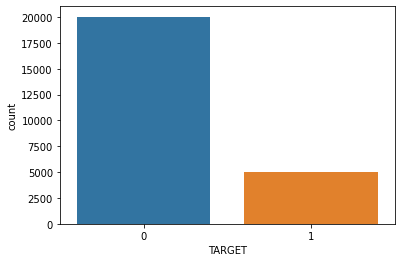

In [104]:
# Show the countplot of the resampled data
sns.countplot(y_train_all_alk)

### Over Sampling

Over sampling, in this case, we use RandomOverSampler because the other algorithm that work with both categorical an nominal data (SMOTENC) seems does not good with the data.

#### SMOTENC

In [105]:
# # Create an array containing cat_columns_all index related to the X_train_all_df.columns
# cat_columns_all_index = []
# for i,j in enumerate(X_train_all_df.columns):
#     if j in cat_columns_all:
#         cat_columns_all_index.append(i)

In [106]:
# # Define SMOTENC model
# smotenc = SMOTENC(categorical_features=cat_columns_all_index, random_state=22, sampling_strategy=0.4, k_neighbors=4)

# # Fit resample to X_train_all_df
# X_train_all_resampled, y_train_all_resampled = smotenc.fit_resample(X_train_all_renn, y_train_all_renn)

In [107]:
# # Show the countplot of the resampled data
# sns.countplot(y_train_all_resampled)

#### Random Over Sampler

In [108]:
# Define Random Over Sampler model
smotenc = RandomOverSampler(random_state=22, sampling_strategy=0.4)

# Fit resample to X_train_all_df
X_train_all_resampled, y_train_all_resampled = smotenc.fit_resample(X_train_all_alk, y_train_all_alk)

In [109]:
# Convert Back to DataFrame
X_train_all_resampled = pd.DataFrame(X_train_all_resampled, columns=all_columns)
X_train_all_resampled.head()

,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,...,FULLY_PAID_Yes,FULLY_PAID_no historical data,LAST_PAYMENT_STATUS_Not pay above a Month,LAST_PAYMENT_STATUS_Not pay between 8-30 days,LAST_PAYMENT_STATUS_Not pay within a week,LAST_PAYMENT_STATUS_Paid in time,LAST_PAYMENT_STATUS_Paid late between 8 and 30 days,LAST_PAYMENT_STATUS_Paid late more than a month,LAST_PAYMENT_STATUS_Paid late within a week,LAST_PAYMENT_STATUS_no historical data
0,0.000000,0.008562,0.090517,0.089486,0.078652,0.253702,1.000000,0.618938,0.312719,0.608696,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.004807,0.129213,0.056333,0.129213,0.481773,0.043251,0.691643,0.948836,0.695652,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.111111,0.004807,0.116716,0.125893,0.104494,0.852073,0.045572,0.930129,0.554192,0.695652,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.009814,0.197348,0.158236,0.157303,0.249430,1.000000,0.672409,0.382053,0.652174,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.222222,0.006059,0.056180,0.059552,0.056180,0.178970,1.000000,0.375567,0.320529,0.434783,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model Building and Evaluation

## Feature Importance Analysis

We will use metric Recall value on target pos 1 (which is the late payer). It was chosen to minimize false negative, that means we will minimize the number of true late payer become classified as not late payer.<br><br>

This consideration is based on assumption that when we failed to predict the late payer, the cost is bigger than our opportunity to score profit.<br><br>

In addition, nowadays, the interest used is very competitive (because of the number of competitor is increasing) and the rate of inflation is potentially increase in current year. So, per one customer who loan, we only could get little profit compared to amount of bad debt of one customer.

### Decision Tree

In [110]:
# Fit data to Decision Tree model
model_dt = DecisionTreeClassifier(random_state =22)
model_dt.fit(X_train_all_resampled, y_train_all_resampled)

DecisionTreeClassifier(random_state=22)

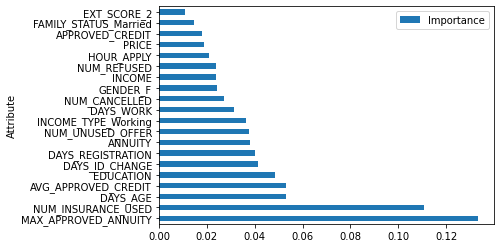

In [111]:
# Create variable to be used in dataframe
Attribute = all_columns
Importance = model_dt.feature_importances_

# Create dataframe of Attribute and Importance
dt_importances = pd.DataFrame({'Attribute': Attribute, 'Importance': Importance}).sort_values(by='Importance', ascending=False)

# Create top 20 features graph
dt_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

In [112]:
# Create classification report to select best algorithm for feature selection
y_pred = model_dt.predict(X_test_all_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84     13558
           1       0.14      0.46      0.22      1203

    accuracy                           0.73     14761
   macro avg       0.54      0.61      0.53     14761
weighted avg       0.87      0.73      0.79     14761



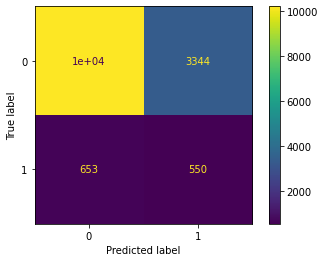

In [113]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [114]:
# Calculate ROC AUC Score
roc_auc_score(y_test, y_pred)

0.605273154822537

### Random Forest

In [115]:
# Fit data to Random Forest Classifier model
model_rf = RandomForestClassifier(random_state =22)
model_rf.fit(X_train_all_resampled, y_train_all_resampled)

RandomForestClassifier(random_state=22)

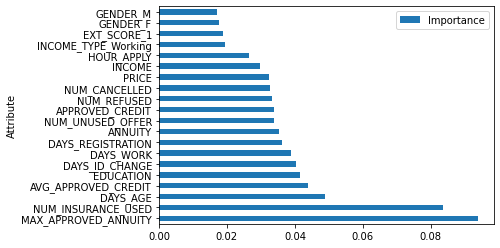

In [116]:
# Create variable to be used in dataframe
Attribute = all_columns
Importance = model_rf.feature_importances_

# Create dataframe of Attribute and Importance
rf_importances = pd.DataFrame({'Attribute': Attribute, 'Importance': Importance}).sort_values(by='Importance', ascending=False)

# Create top 20 features graph
rf_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

In [117]:
# Create classification report to select best algorithm for feature selection
y_pred = model_rf.predict(X_test_all_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     13558
           1       0.20      0.40      0.27      1203

    accuracy                           0.82     14761
   macro avg       0.57      0.63      0.58     14761
weighted avg       0.88      0.82      0.85     14761



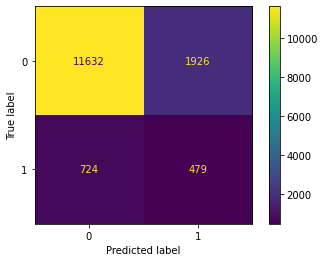

In [118]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [119]:
# Calculate ROC AUC Score
roc_auc_score(y_test, y_pred)

0.6280574440380339

### Logistic regression

In [120]:
# Fit model to train set
model_lr = LogisticRegression(random_state =22, max_iter=500)
model_lr.fit(X_train_all_resampled, y_train_all_resampled)

# Create dataframe to show the importance of each feature to target
lr_importances = pd.DataFrame(data={
    'Attribute': all_columns,
    'Importance': model_lr.coef_[0]})
lr_importances = lr_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
lr_importances

,Attribute,Importance
0,SUM_APPROVED_CREDIT,1.377572
1,APPROVED_CREDIT,1.356406
2,NUM_CANCELLED,1.265678
3,ORGANIZATION_TYPE_Religion,1.224436
4,NUM_REFUSED,1.150996
...,...,...
115,NUM_UNUSED_OFFER,-1.857630
116,PRICE,-2.118242
117,AVG_APPROVED_CREDIT,-2.127905
118,MAX_APPROVED_ANNUITY,-2.910594


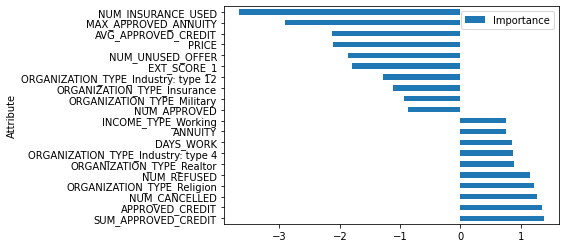

In [121]:
# Query top and bottom features together

lr_importances_most = pd.concat([lr_importances.head(10), lr_importances.tail(10)])

# Create horizontal bar plot of importances
lr_importances_most.plot(kind='barh', x='Attribute', y='Importance')
plt.show()

In [122]:
# Create classification report to select best algorithm for feature selection
y_pred = model_lr.predict(X_test_all_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     13558
           1       0.17      0.54      0.26      1203

    accuracy                           0.75     14761
   macro avg       0.56      0.65      0.55     14761
weighted avg       0.89      0.75      0.80     14761



In [123]:
# Calculate ROC AUC Score
roc_auc_score(y_test, y_pred)

0.6513620188109653

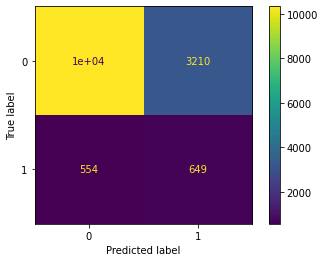

In [124]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### XGB Classifier

In [125]:
# Fit model to train set
model_xgb = XGBClassifier()
model_xgb.fit(X_train_all_resampled, y_train_all_resampled)

# Create dataframe to show the importance of each feature to target
xgb_importances = pd.DataFrame(data={
    'Attribute': all_columns,
    'Importance': model_xgb.feature_importances_
})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
xgb_importances.head(10)

,Attribute,Importance
32,INCOME_TYPE_Working,0.060315
21,EDUCATION,0.043840
28,INCOME_TYPE_Pensioner,0.033185
24,GENDER_F,0.032427
34,FAMILY_STATUS_Married,0.029871
20,NUM_INSURANCE_USED,0.027165
22,CONTRACT_TYPE_Cash loans,0.027006
19,MAX_APPROVED_ANNUITY,0.025457
118,LAST_PAYMENT_STATUS_Paid late within a week,0.025119
119,LAST_PAYMENT_STATUS_no historical data,0.018817


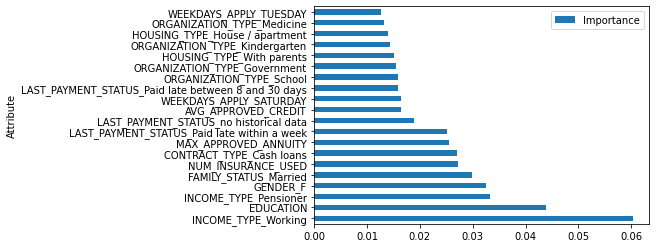

In [126]:
# Create horizontal bar plot of importances
xgb_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

In [127]:
# Create classification report to select best algorithm for feature selection
y_pred = model_xgb.predict(X_test_all_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85     13558
           1       0.18      0.54      0.27      1203

    accuracy                           0.76     14761
   macro avg       0.56      0.66      0.56     14761
weighted avg       0.89      0.76      0.81     14761



In [128]:
# Calculate ROC AUC Score
roc_auc_score(y_test, y_pred)

0.6597364336123354

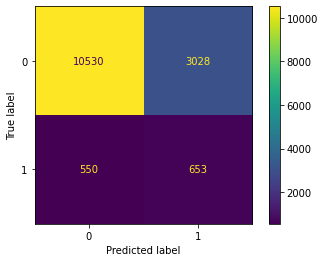

In [129]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### AdaBoost Classifier

In [130]:
# import adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [131]:
# Fit data to Random Forest Classifier model
model_ada = AdaBoostClassifier(random_state =22)
model_ada.fit(X_train_all_resampled, y_train_all_resampled)

AdaBoostClassifier(random_state=22)

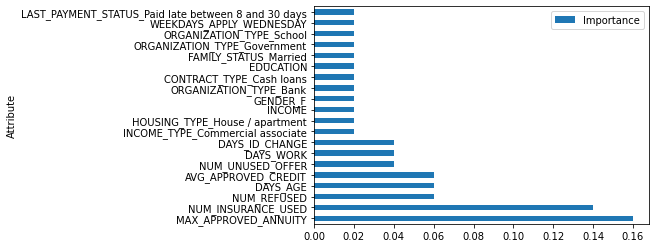

In [132]:
# Create variable to be used in dataframe
Attribute = all_columns
Importance = model_ada.feature_importances_

# Create dataframe of Attribute and Importance
ada_importances = pd.DataFrame({'Attribute': Attribute, 'Importance': Importance}).sort_values(by='Importance', ascending=False)

# Create top 20 features graph
ada_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

In [133]:
# Create classification report to select best algorithm for feature selection
y_pred = model_ada.predict(X_test_all_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     13558
           1       0.17      0.55      0.26      1203

    accuracy                           0.74     14761
   macro avg       0.56      0.66      0.55     14761
weighted avg       0.89      0.74      0.80     14761



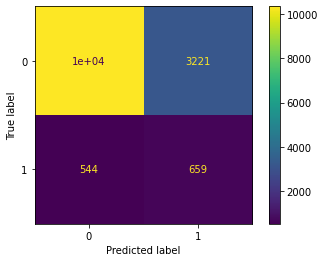

In [134]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

## Feature Selection

> Because Adaboost Classifier Model has the higher recall score in pos 1, we will use its most importance features to be used on imbalance dataset handling

In [135]:
# Show dt_importances head
ada_importances.head()

,Attribute,Importance
19,MAX_APPROVED_ANNUITY,0.16
20,NUM_INSURANCE_USED,0.14
15,NUM_REFUSED,0.06
5,DAYS_AGE,0.06
18,AVG_APPROVED_CREDIT,0.06


<AxesSubplot:>

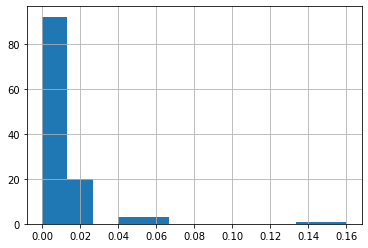

In [136]:
# Show the distribution of the importance of the features
ada_importances['Importance'].hist(bins=12)

It seems that many of the features have importance value below 0.01, which have very small impact to the target. Thus we will not use those features.

In [137]:
# Make a list to store the features that having importance greater than 0.02
features_to_keep = []
for i in range(len(rf_importances)):
    if ada_importances['Importance'][i] > 0.01:
        features_to_keep.append(ada_importances['Attribute'][i])
features_to_keep

['INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'EXT_SCORE_1',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED',
 'EDUCATION',
 'CONTRACT_TYPE_Cash loans',
 'GENDER_F',
 'INCOME_TYPE_Commercial associate',
 'INCOME_TYPE_State servant',
 'FAMILY_STATUS_Married',
 'HOUSING_TYPE_House / apartment',
 'WEEKDAYS_APPLY_TUESDAY',
 'WEEKDAYS_APPLY_WEDNESDAY',
 'ORGANIZATION_TYPE_Bank',
 'ORGANIZATION_TYPE_Government',
 'ORGANIZATION_TYPE_School',
 'LAST_PAYMENT_STATUS_Paid late between 8 and 30 days',
 'LAST_PAYMENT_STATUS_Paid late within a week']

In [138]:
# Query X_train_all_resampled and X_test_all_resampled to keep only the selected features
X_train_selected_features = X_train_all_resampled[features_to_keep]
X_test_selected_features = X_test_all_df[features_to_keep]
X_train_selected_features.head()

,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,NUM_REFUSED,...,INCOME_TYPE_State servant,FAMILY_STATUS_Married,HOUSING_TYPE_House / apartment,WEEKDAYS_APPLY_TUESDAY,WEEKDAYS_APPLY_WEDNESDAY,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_School,LAST_PAYMENT_STATUS_Paid late between 8 and 30 days,LAST_PAYMENT_STATUS_Paid late within a week
0,0.008562,0.090517,0.089486,0.078652,0.253702,1.000000,0.312719,0.608696,0.173913,0.066856,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004807,0.129213,0.056333,0.129213,0.481773,0.043251,0.948836,0.695652,0.260870,0.044674,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004807,0.116716,0.125893,0.104494,0.852073,0.045572,0.554192,0.695652,0.086957,0.027106,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.009814,0.197348,0.158236,0.157303,0.249430,1.000000,0.382053,0.652174,0.217391,0.009975,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006059,0.056180,0.059552,0.056180,0.178970,1.000000,0.320529,0.434783,0.000000,0.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

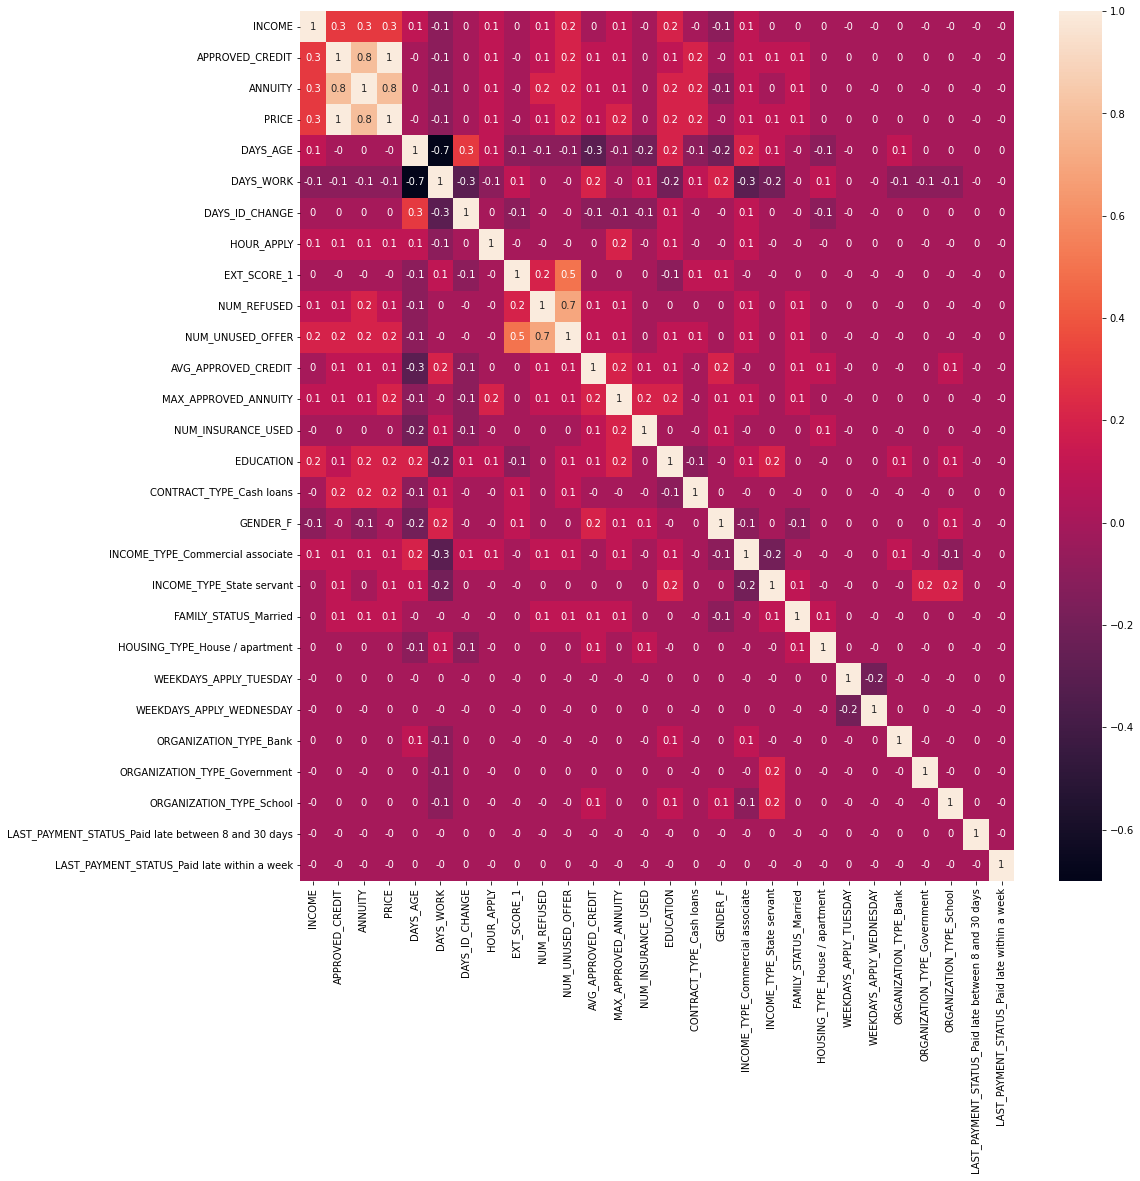

In [139]:
# Check the correlation of each features to prevent intercorrelation between features
corre= X_train_selected_features.corr()

# round the correlation matrix into 1 decimal
corre = corre.round(1)

# Make heatmap of the correlation
fig = plt.figure(figsize=(16,16))
sns.heatmap(corre, annot=True)

From the heatmap it could be seen that some of features have high correlation, so we will remove APPROVED_CREDIT and DAYS_WORK. In this case, eventhough PRICE also have quite high corelation with ANNUITY, it still be preserved, since it is quite important when giving loan.

In [140]:
# Remove 'APPROVED_CREDIT','DAYS_WORK'from features_to_keep
features_to_keep.remove('APPROVED_CREDIT')
features_to_keep.remove('DAYS_WORK')


In [141]:
# Drop APPROVED_CREDIT AND DAYS_WORK
X_train_selected_features = X_train_selected_features.drop(['APPROVED_CREDIT','DAYS_WORK'], axis=1)
X_test_selected_features = X_test_selected_features.drop(['APPROVED_CREDIT','DAYS_WORK'], axis=1)

## Model Evaluation with Selected Features

### Adaboost Classifier

In [142]:
# Fit data to Random Forest Classifier model
model_ada = AdaBoostClassifier(random_state =22)
model_ada.fit(X_train_selected_features, y_train_all_resampled)

# Create classification report to select best algorithm for feature selection
y_pred = model_ada.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     13558
           1       0.17      0.53      0.26      1203

    accuracy                           0.75     14761
   macro avg       0.56      0.65      0.55     14761
weighted avg       0.89      0.75      0.80     14761

roc_auc : 0.6511447631106625


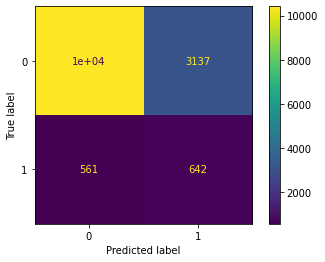

In [143]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### XGB Classifier

In [144]:
# Fit model to train set
model_xgb = XGBClassifier()
model_xgb.fit(X_train_selected_features, y_train_all_resampled)

# Create classification report to select best algorithm for feature selection
y_pred = model_xgb.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     13558
           1       0.18      0.51      0.27      1203

    accuracy                           0.77     14761
   macro avg       0.56      0.65      0.56     14761
weighted avg       0.89      0.77      0.81     14761

roc_auc : 0.6522233164200675


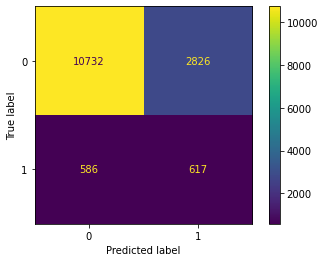

In [145]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

It seems there are only little difference in recall pos 1 score in those models. So, we continue to hyperparameter tuning.

## Hyperparameter Tuning and Model Evaluation

### Make Scorer Parameter

In [146]:
# Make scorer metric on recall pos label 1 using make_scorer
scorer = make_scorer(recall_score, pos_label=1)


### ADABoost Classifier

In [147]:
# Set hyperparameters for ada model
base_estimator = [DecisionTreeClassifier(max_depth =1),DecisionTreeClassifier(max_depth =5),DecisionTreeClassifier(max_depth =10)]
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 3)]
n_estimators = [int(x) for x in np.linspace(50, 250, num = 3)]
random_grid_ada = {'base_estimator': base_estimator, 'learning_rate': learning_rate, 'n_estimators': n_estimators}
random_grid_ada

{'base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=10)],
 'learning_rate': [0.1, 0.55, 1.0],
 'n_estimators': [50, 150, 250]}

In [148]:
# Train with Random Search

ada_randomcv = RandomizedSearchCV(estimator=model_ada, 
                                 param_distributions=random_grid_ada,
                                 n_iter=16,
                                 cv=2, 
                                 random_state=22, 
                                 n_jobs=-1,
                                 scoring=scorer)
ada_randomcv.fit(X_train_selected_features, y_train_all_resampled)

RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(random_state=22),
                   n_iter=16, n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                                           DecisionTreeClassifier(max_depth=5),
                                                           DecisionTreeClassifier(max_depth=10)],
                                        'learning_rate': [0.1, 0.55, 1.0],
                                        'n_estimators': [50, 150, 250]},
                   random_state=22,
                   scoring=make_scorer(recall_score, pos_label=1))

In [149]:
# Show the best parameters from random search cv
ada_randomcv.best_params_ 

{'n_estimators': 150,
 'learning_rate': 1.0,
 'base_estimator': DecisionTreeClassifier(max_depth=5)}

In [150]:
# Define the model with the best parameters
ada_randomcv_best = ada_randomcv.best_estimator_

In [151]:
# Create classification report to select best algorithm for feature selection
y_pred = ada_randomcv_best.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     13558
           1       0.16      0.45      0.24      1203

    accuracy                           0.76     14761
   macro avg       0.55      0.62      0.55     14761
weighted avg       0.88      0.76      0.81     14761

roc_auc : 0.619898047083697


In [152]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search ada
base_estimator = [DecisionTreeClassifier(max_depth =4),DecisionTreeClassifier(max_depth =5),DecisionTreeClassifier(max_depth =6)]
learning_rate = [ada_randomcv.best_params_['learning_rate']-0.1,
        ada_randomcv.best_params_['learning_rate'],
        ada_randomcv.best_params_['learning_rate']+0.1]   
n_estimators = [ada_randomcv.best_params_['n_estimators']-20,
                ada_randomcv.best_params_['n_estimators'], 
                ada_randomcv.best_params_['n_estimators']+20,]
param_grid_ada = {'base_estimator': base_estimator, 'learning_rate': learning_rate, 'n_estimators': n_estimators}
param_grid_ada

{'base_estimator': [DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=6)],
 'learning_rate': [0.9, 1.0, 1.1],
 'n_estimators': [130, 150, 170]}

In [153]:
# Train model ada dengan Grid Search

ada_gridcv = GridSearchCV(estimator=model_ada,
                         param_grid=param_grid_ada,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring=scorer)

ada_gridcv.fit(X_train_selected_features, y_train_all_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=22), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=6)],
                         'learning_rate': [0.9, 1.0, 1.1],
                         'n_estimators': [130, 150, 170]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=2)

In [154]:
# Show the best parameters from grid search cv
ada_gridcv.best_params_ 

{'base_estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 1.1,
 'n_estimators': 150}

In [155]:
# Define the model with the best parameters
ada_gridcv_best = ada_gridcv.best_estimator_

In [156]:
# Create classification report to select best algorithm for feature selection
y_pred = ada_gridcv_best.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     13558
           1       0.16      0.43      0.23      1203

    accuracy                           0.76     14761
   macro avg       0.55      0.61      0.54     14761
weighted avg       0.88      0.76      0.81     14761

roc_auc : 0.6126380218995707


### XGBoost Classifier

In [157]:
# Set hyperparameters for xgb model
booster = ['gbtree', 'dart']
eta = [float(x) for x in np.linspace(0.1, 0.3, num = 3)]
max_depth = [int(x) for x in np.linspace(4, 14, num = 5)]
eval_metric = [scorer]
random_grid_xgb = {'booster': booster, 'eta': eta, 'max_depth': max_depth, 'eval_metric': eval_metric}
random_grid_xgb

{'booster': ['gbtree', 'dart'],
 'eta': [0.1, 0.2, 0.3],
 'max_depth': [4, 6, 9, 11, 14],
 'eval_metric': [make_scorer(recall_score, pos_label=1)]}

In [158]:
# Train with Random Search

xgb_randomcv = RandomizedSearchCV(estimator=model_xgb, 
                                 param_distributions=random_grid_xgb,
                                 n_iter=20,
                                 cv=2, 
                                 random_state=22, 
                                 n_jobs=-1,
                                 scoring=scorer)
xgb_randomcv.fit(X_train_selected_features, y_train_all_resampled)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=

In [159]:
# Show the best parameters from random search cv
xgb_randomcv.best_params_ 

{'max_depth': 11,
 'eval_metric': make_scorer(recall_score, pos_label=1),
 'eta': 0.2,
 'booster': 'dart'}

In [160]:
# Define the model with the best parameters
xgb_randomcv_best = xgb_randomcv.best_estimator_

In [161]:
# Create classification report to select best algorithm for feature selection
y_pred = xgb_randomcv_best.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     13558
           1       0.18      0.47      0.26      1203

    accuracy                           0.79     14761
   macro avg       0.56      0.64      0.57     14761
weighted avg       0.88      0.79      0.83     14761

roc_auc : 0.6420968770972211


In [162]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search xgb
booster = [xgb_randomcv.best_params_['booster']]
eta = [xgb_randomcv.best_params_['eta']-0.05,
        xgb_randomcv.best_params_['eta'],
        xgb_randomcv.best_params_['eta']+0.05]   
max_depth = [xgb_randomcv.best_params_['max_depth']-1,
                xgb_randomcv.best_params_['max_depth'], 
                xgb_randomcv.best_params_['max_depth']+1,]
eval_metric = [xgb_randomcv.best_params_['eval_metric']]
param_grid_xgb = {'booster': booster,'eta': eta,  'max_depth': max_depth, 'eval_metric': eval_metric}
param_grid_xgb

{'booster': ['dart'],
 'eta': [0.15000000000000002, 0.2, 0.25],
 'max_depth': [10, 11, 12],
 'eval_metric': [make_scorer(recall_score, pos_label=1)]}

In [163]:
# Train model xgb dengan Grid Search

xgb_gridcv = GridSearchCV(estimator=model_xgb,
                         param_grid=param_grid_xgb,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring=scorer)

xgb_gridcv.fit(X_train_selected_features, y_train_all_resampled)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parall

In [164]:
# Show the best parameters from grid search cv
xgb_gridcv.best_params_ 

{'booster': 'dart',
 'eta': 0.15000000000000002,
 'eval_metric': make_scorer(recall_score, pos_label=1),
 'max_depth': 12}

In [165]:
# Define the model with the best parameters
xgb_gridcv_best = xgb_gridcv.best_estimator_

In [166]:
# Create classification report to select best algorithm for feature selection
y_pred = xgb_gridcv_best.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     13558
           1       0.18      0.46      0.26      1203

    accuracy                           0.79     14761
   macro avg       0.56      0.64      0.57     14761
weighted avg       0.88      0.79      0.83     14761

roc_auc : 0.6403506464698263


The result of hyperparameter tuning seems to not be good. it even worst than befor tuning process. So, we will use the model xgboost before the tuning. 

## Best Model Evaluation

In [167]:
# Best Model Evaluation
y_pred = model_xgb.predict(X_test_selected_features)
print(classification_report(y_test, y_pred))
print('roc_auc :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     13558
           1       0.18      0.51      0.27      1203

    accuracy                           0.77     14761
   macro avg       0.56      0.65      0.56     14761
weighted avg       0.89      0.77      0.81     14761

roc_auc : 0.6522233164200675


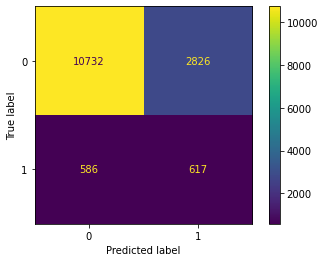

In [168]:
# Show confusion matrix display for further understanding
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Model Implementation

## Ranking Customer in Test Set

We will use model XGBoost to rank the data since it considered to be best model due to its recall in pos 1 value.

In [169]:
# Make Predictions of the test set
y_pred = model_xgb.predict(X_test_selected_features)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [170]:
# Extract the probability predictions of the test set into a dataframe
y_prob = model_xgb.predict_proba(X_test_selected_features)
y_prob_df = pd.DataFrame(y_prob, columns=['prob_0', 'prob_1'])
y_prob_df.head()

,prob_0,prob_1
0,0.189707,0.810293
1,0.934117,0.065883
2,0.995538,0.004462
3,0.037999,0.962001
4,0.532217,0.467783


In [171]:
# See the original test set
app_test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,0.504075,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,0.504075,0.682675,0.510793
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [172]:
# Add columns of prob_1 and y_pred to the test set
app_test['prob_1'] = y_prob_df['prob_1'].tolist()
app_test['y_pred'] = y_pred
app_test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,prob_1,y_pred
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,0.504075,0.145475,0.651260,0.810293,1
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-7908.0,-4872,MONDAY,14,Kindergarten,0.504075,0.682675,0.510793,0.065883,0
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393,0.004462,0
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826,0.962001,1
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774,0.467783,0


Notes: probability to be classify as 1 could be translated into probability that the customer to be late payer or not pay the loan, in other means it is possible that the loan become bad debt. So, by using the probability, we can rank the customer, where the lower probability is more likely a good customer.

In [173]:
# Rank the customer in the original test set
app_test_ranked = app_test.sort_values(by=['prob_1'], ascending=True).reset_index(drop=True)
app_test_ranked.head().T

,0,1,2,3,4
Unnamed: 0,117416,277771,165803,188085,158812
LN_ID,236157,421818,292201,318041,284116
TARGET,0,0,0,0,0
CONTRACT_TYPE,Revolving loans,Cash loans,Cash loans,Revolving loans,Revolving loans
GENDER,F,M,F,M,M
NUM_CHILDREN,2,0,2,0,0
INCOME,180000.0,675000.0,315000.0,450000.0,270000.0
APPROVED_CREDIT,135000.0,1615500.0,1440000.0,1125000.0,1350000.0
ANNUITY,6750.0,149625.0,40432.5,56250.0,67500.0
PRICE,135000.0,1615500.0,1440000.0,1125000.0,1350000.0


In [174]:
# Merge it with derived historical data
app_test_ranked_with_historical = app_test_ranked.merge(historical_cust_summary, on='LN_ID', how='left')
app_test_ranked_with_historical.head().T

,0,1,2,3,4
Unnamed: 0,117416,277771,165803,188085,158812
LN_ID,236157,421818,292201,318041,284116
TARGET,0,0,0,0,0
CONTRACT_TYPE,Revolving loans,Cash loans,Cash loans,Revolving loans,Revolving loans
GENDER,F,M,F,M,M
NUM_CHILDREN,2,0,2,0,0
INCOME,180000.0,675000.0,315000.0,450000.0,270000.0
APPROVED_CREDIT,135000.0,1615500.0,1440000.0,1125000.0,1350000.0
ANNUITY,6750.0,149625.0,40432.5,56250.0,67500.0
PRICE,135000.0,1615500.0,1440000.0,1125000.0,1350000.0


Those Null values comes because no data regarding it, and it have replaced using 0 and 'no historical data' when do training.

## Selecting 3 Most Importance Features

In order to select 3 most importance features, we can look at feature importance of the model. In this case, since the model seems to be overfit and the data is heavily unbalanced. We can look for most appearing features first then its importance (because it more likely that the importance value does not right, means that if its right, the evaluation should be better). 

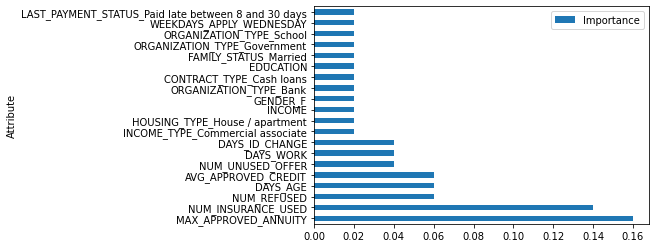

In [175]:
# Top 20 features in the ada model before feature selection
ada_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()


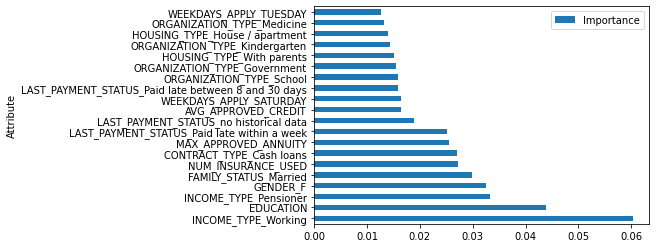

In [176]:
# Top 20 features in the xgb model before feature selection
xgb_importances.head(20).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

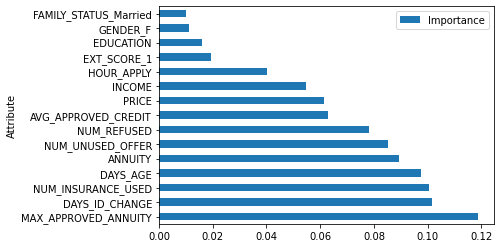

In [177]:
# Top 20 features in the ada model after feature selection and hyperparameter tuning
# Create variable to be used in dataframe
Attribute = features_to_keep
Importance = ada_gridcv_best.feature_importances_

# Create dataframe of Attribute and Importance
ada_importances = pd.DataFrame({'Attribute': Attribute, 'Importance': Importance}).sort_values(by='Importance', ascending=False)

# Create top 10 features graph
ada_importances.head(15).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

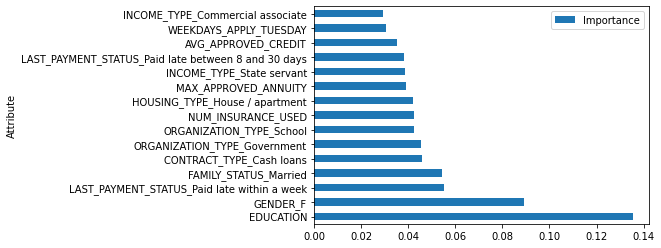

In [178]:
# Top 20 features in the xgb model after feature selection and hyperparameter tuning
# Create variable to be used in dataframe
Attribute = features_to_keep
Importance = xgb_gridcv_best.feature_importances_

# Create dataframe of Attribute and Importance
xgb_importances = pd.DataFrame({'Attribute': Attribute, 'Importance': Importance}).sort_values(by='Importance', ascending=False)

# Create top 10 features graph
xgb_importances.head(15).plot(kind='barh', x='Attribute', y='Importance')
plt.show()

Based on those graph, we can conclude that the most importance feature is
- 1. EDUCATION     
    - Selected because its appears in all graphs, and has highest importance in total
    - Education could be considered have linear relationship with customer financial knowledge. In which the more educated, the more chance that the customer keep their good names and also the more that the customer can manage their money. 
- 2. MAX_APPROVED_ANNUITY 
    - Selected because its appears in all graphs, and has high importance in total)
    - MAX_APPROVED_ANNUITY is the maximum annuity that customer can get from previous loan. It reflects how much money that customer have already proven to make payment in previous loan.
- 3. FAMILY STATUS 
    - Because its appear in all graphs
    - Family status, espesially married, could give us information:
        - Customer is tend to more responsible, such as make commitment to the loan application
        - Customer have more fix address, so they will preserve their good names in their living area.
        - Customer will have high probability that their finance is more well managed.

# Data and Model Saving

## Data Saving

In [179]:
# Save customer historical data summary
historical_cust_summary.to_csv('historical_cust_summary.csv', index=False)

In [180]:
# Save data Train and Test that has been preprocessed
# X_train and X_test 
X_train_selected_features.to_csv('X_train_selected_features.csv', index=False)
X_test_selected_features.to_csv('X_test_selected_features.csv', index=False)

# y_train and y_test
y_train_all_resampled.to_csv('y_train_all_resampled.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## Model Saving

In [181]:
# Save imputer_mean
with open('imputer_mean.pkl', 'wb') as f:
    pickle.dump(imputer_mean, f)

# Save imputer_median
with open('imputer_median.pkl', 'wb') as f:
    pickle.dump(imputer_median, f)

# Save imputer_0
with open('imputer_0.pkl', 'wb') as f:
    pickle.dump(imputer_0, f)

# Save imputer_nan
with open('imputer_nan.pkl', 'wb') as f:
    pickle.dump(imputer_nan, f)

# Save imputer_none
with open('imputer_none.pkl', 'wb') as f:
    pickle.dump(imputer_none, f)

# Save ordinal_encoder
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)

# Save ohe_encoder
with open('ohe_encoder.pkl', 'wb') as f:
    pickle.dump(ohe_encoder, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save model_xgb
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

# Data Inference

## Load Data Historical and Model

In [182]:
# Load historical_cust_summary
historical_cust_summary = pd.read_csv('historical_cust_summary.csv')

In [183]:
# Load imputer_mean
with open('imputer_mean.pkl', 'rb') as f:
    imputer_mean = pickle.load(f)

# Load imputer_median
with open('imputer_median.pkl', 'rb') as f:
    imputer_median = pickle.load(f)

# Load imputer_0
with open('imputer_0.pkl', 'rb') as f:
    imputer_0 = pickle.load(f)

# Load imputer_nan
with open('imputer_nan.pkl', 'rb') as f:
    imputer_nan = pickle.load(f)

# Load imputer_none
with open('imputer_none.pkl', 'rb') as f:
    imputer_none = pickle.load(f)

# Load ordinal_encoder
with open('ordinal_encoder.pkl', 'rb') as f:
    ordinal_encoder = pickle.load(f)

# Load ohe_encoder
with open('ohe_encoder.pkl', 'rb') as f:
    ohe_encoder = pickle.load(f)

# Load scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load model_xgb
with open('model_xgb.pkl', 'rb') as f:
    model_xgb = pickle.load(f)

## Make Sample Data for Inference

In [184]:
# Select 5 random data from app_test for inference
app_inference = app_test_ori.sample(5)
app_inference.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
7719,41586,148148,0,Cash loans,F,0,45000.0,284400.0,16011.0,225000.0,...,-24294,365243,-3508.0,-4113,FRIDAY,8,NA1,NaN,0.608370,0.733815
9737,5005,105855,0,Revolving loans,M,1,225000.0,405000.0,20250.0,405000.0,...,-17612,-436,-5183.0,-1168,MONDAY,9,Business Entity Type 3,NaN,0.607765,0.612704
11327,161522,287246,0,Cash loans,M,1,90000.0,139230.0,11290.5,112500.0,...,-9701,-2207,-1798.0,-2147,TUESDAY,9,Government,NaN,0.518684,NaN
6763,162600,288499,0,Cash loans,F,0,135000.0,315000.0,17217.0,315000.0,...,-8651,-598,-3498.0,-1337,WEDNESDAY,13,Trade: type 3,0.158248,0.594306,0.245851
3081,12669,114768,0,Cash loans,F,2,135000.0,301464.0,22068.0,238500.0,...,-13270,-1794,-4975.0,-4203,MONDAY,9,Kindergarten,0.747162,0.630052,NaN


## Inference Data Preprocessing

### Preliminary Handling Missing Value

In [185]:
# Define variables of distribution 
app_normal_col= ['EXT_SCORE_1', 'EXT_SCORE_3']
app_skewed_col= ['EXT_SCORE_2', 'PRICE']

In [186]:
# Fill Missing Value with Mean and Median
app_inference[app_normal_col] = imputer_mean.transform(app_inference[app_normal_col])
app_inference[app_skewed_col] = imputer_median.transform(app_inference[app_skewed_col])

### Merge Data with Historical Data.

In [187]:
# Merge the app_inference with the historical data
app_inference_with_historical = app_inference.merge(historical_cust_summary, on='LN_ID', how='left')

In [188]:
# Make list of numerical and categorical columns for merged data
merged_numerical = ['NUM_APPROVED','NUM_CANCELLED','NUM_REFUSED','NUM_UNUSED_OFFER','SUM_APPROVED_CREDIT','AVG_APPROVED_CREDIT','MAX_APPROVED_ANNUITY','NUM_INSURANCE_USED']
merged_categorical = ['LAST_PAYMENT_STATUS','FULLY_PAID']

### Handling Missing Value that Comes After Merging

In [189]:
# Transform data inference using simple imputer
# Fill Numerical Missing value to 0
app_inference_with_historical[merged_numerical] = imputer_0.transform(app_inference_with_historical[merged_numerical])

# Fill Categorical Missing Value Nan with 'no historical data'
app_inference_with_historical[merged_categorical] = imputer_nan.transform(app_inference_with_historical[merged_categorical])

# Fill Categorical Missing Value None with 'no historical data'
app_inference_with_historical[merged_categorical] = imputer_none.transform(app_inference_with_historical[merged_categorical])

In [190]:
# Define variables
num_columns = ['NUM_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_WORK',
 'DAYS_REGISTRATION',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'EXT_SCORE_1',
 'EXT_SCORE_2',
 'EXT_SCORE_3',
 'NUM_APPROVED',
 'NUM_CANCELLED',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'SUM_APPROVED_CREDIT',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED']
cat_columns = ['CONTRACT_TYPE',
 'GENDER',
 'INCOME_TYPE',
 'EDUCATION',
 'FAMILY_STATUS',
 'HOUSING_TYPE',
 'WEEKDAYS_APPLY',
 'ORGANIZATION_TYPE',
 'FULLY_PAID',
 'LAST_PAYMENT_STATUS']

# Define feature to be encoded
ordinal_features = ['EDUCATION']
ohe_features = []
for i in cat_columns:
    if i not in ordinal_features:
        ohe_features.append(i) 

### Feature Splitting

In [191]:
# Separate X and y in inference
X_inference = app_inference_with_historical.drop(['TARGET'], axis=1)
y_inference = app_inference_with_historical['TARGET']

# Separate numerical and categorical columns
X_inference_num = X_inference[num_columns]
X_inference_cat = X_inference[cat_columns]

# Separate categorical data
X_inference_cat_ordinal = X_inference_cat[ordinal_features]
X_inference_cat_ohe = X_inference_cat[ohe_features]

### Feature Encoding

In [192]:
# Encoding Categorical Data
# Ordinal Encoding
X_inference_cat_ordinal_encoded = ordinal_encoder.transform(X_inference_cat_ordinal)

# One Hot Encoding
X_inference_cat_ohe = ohe_encoder.transform(X_inference_cat_ohe)

# Concatenate categorical features
X_inference_cat_all_encoded = np.concatenate((X_inference_cat_ordinal_encoded, X_inference_cat_ohe), axis=1)

In [193]:
# Create list of all columns name after encoded to see in dataframe later
# Create an empty list
cat_columns_all = []

# Append all ordinal features
cat_columns_all.append(ordinal_features[0]) # only single columns since it is only contain Education in one column

# Append all one hot encoded (ohe) features
for i,j in enumerate(ohe_encoder.feature_names_in_):
    for k,l in enumerate(ohe_encoder.categories_[i]):
        cat_columns_all.append(str(j+'_'+l))

### Feature Scaling

In [194]:
# Feature Scaling
# List all X_train_num without the ext since ext already normalized by its definition
num_col_without_ext = X_inference_num.columns.tolist()
num_col_without_ext.remove('EXT_SCORE_1')
num_col_without_ext.remove('EXT_SCORE_2')
num_col_without_ext.remove('EXT_SCORE_3')

In [195]:
# Convert X_inference_num[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']] to np array
X_inference_num_scaled_ext = np.array(X_inference_num[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']])

In [196]:
# Scaling numerical data using MinMaxScaler
X_inference_num_scaled = scaler.transform(X_inference_num[num_col_without_ext])

In [197]:
# Concatenate X_inference_num_scaled array with value from EXT_SCORE_1, EXT_SCORE_2, EXT_SCORE_3
X_inference_num_scaled = np.concatenate((X_inference_num_scaled, X_inference_num_scaled_ext), axis=1)

In [198]:
# Concatenate Scaled and Encoded Data
X_inference_all = np.concatenate((X_inference_num_scaled, X_inference_cat_all_encoded), axis=1)

In [199]:
# Concatenate num_columns_all with cat_columns_all
all_columns =[]
for i in num_columns_all:
    all_columns.append(i)
for i in cat_columns_all:
    all_columns.append(i)

In [200]:
# Convert Back to DataFrame
X_inference_all_df = pd.DataFrame(X_inference_all, columns=all_columns)

### Query Most Importance Features

In [201]:
# Make variable of importance feature to keep
features_to_keep = ['INCOME',
 'ANNUITY',
 'PRICE',
 'DAYS_AGE',
 'DAYS_ID_CHANGE',
 'HOUR_APPLY',
 'EXT_SCORE_1',
 'NUM_REFUSED',
 'NUM_UNUSED_OFFER',
 'AVG_APPROVED_CREDIT',
 'MAX_APPROVED_ANNUITY',
 'NUM_INSURANCE_USED',
 'EDUCATION',
 'CONTRACT_TYPE_Cash loans',
 'GENDER_F',
 'INCOME_TYPE_Commercial associate',
 'INCOME_TYPE_State servant',
 'FAMILY_STATUS_Married',
 'HOUSING_TYPE_House / apartment',
 'WEEKDAYS_APPLY_TUESDAY',
 'WEEKDAYS_APPLY_WEDNESDAY',
 'ORGANIZATION_TYPE_Bank',
 'ORGANIZATION_TYPE_Government',
 'ORGANIZATION_TYPE_School',
 'LAST_PAYMENT_STATUS_Paid late between 8 and 30 days',
 'LAST_PAYMENT_STATUS_Paid late within a week']

In [202]:
# Query data inference to keep only the selected features
X_inference_selected_features = X_inference_all_df[features_to_keep]

## Model Inference Prediction and Evaluation

In [203]:
# Make Predictions of the inference set
y_pred = model_xgb.predict(X_inference_selected_features)

In [204]:
# Extract the probability predictions of the inference set into a dataframe
y_prob = model_xgb.predict_proba(X_inference_selected_features)
y_prob_df = pd.DataFrame(y_prob, columns=['prob_0', 'prob_1'])
y_prob_df.head()

,prob_0,prob_1
0,0.952309,0.047691
1,0.953692,0.046308
2,0.847959,0.152041
3,0.517606,0.482394
4,0.842632,0.157368


In [205]:
y_prob_df['prob_1'].tolist()

[0.04769061505794525,
 0.04630829393863678,
 0.1520409733057022,
 0.48239433765411377,
 0.15736845135688782]

In [206]:
# Add columns of prob_1 and y_pred to the inference set
app_inference['prob_1'] = y_prob_df['prob_1'].tolist()
app_inference['y_pred'] = y_pred
app_inference.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,prob_1,y_pred
7719,41586,148148,0,Cash loans,F,0,45000.0,284400.0,16011.0,225000.0,...,-3508.0,-4113,FRIDAY,8,NA1,0.504075,0.608370,0.733815,0.047691,0
9737,5005,105855,0,Revolving loans,M,1,225000.0,405000.0,20250.0,405000.0,...,-5183.0,-1168,MONDAY,9,Business Entity Type 3,0.504075,0.607765,0.612704,0.046308,0
11327,161522,287246,0,Cash loans,M,1,90000.0,139230.0,11290.5,112500.0,...,-1798.0,-2147,TUESDAY,9,Government,0.504075,0.518684,0.510793,0.152041,0
6763,162600,288499,0,Cash loans,F,0,135000.0,315000.0,17217.0,315000.0,...,-3498.0,-1337,WEDNESDAY,13,Trade: type 3,0.158248,0.594306,0.245851,0.482394,0
3081,12669,114768,0,Cash loans,F,2,135000.0,301464.0,22068.0,238500.0,...,-4975.0,-4203,MONDAY,9,Kindergarten,0.747162,0.630052,0.510793,0.157368,0


In [207]:
# Rank the customer in the original inference set
app_inference_ranked = app_inference.sort_values(by=['prob_1'], ascending=True).reset_index(drop=True)
app_inference_ranked.head().T

,0,1,2,3,4
Unnamed: 0,5005,41586,161522,12669,162600
LN_ID,105855,148148,287246,114768,288499
TARGET,0,0,0,0,0
CONTRACT_TYPE,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans
GENDER,M,F,M,F,F
NUM_CHILDREN,1,0,1,2,0
INCOME,225000.0,45000.0,90000.0,135000.0,135000.0
APPROVED_CREDIT,405000.0,284400.0,139230.0,301464.0,315000.0
ANNUITY,20250.0,16011.0,11290.5,22068.0,17217.0
PRICE,405000.0,225000.0,112500.0,238500.0,315000.0
